In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

In [68]:
df=pd.read_csv(r"day.csv")

In [69]:
df

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

In [70]:
# check the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [71]:
# describe the data (numerical)
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [72]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [73]:
# drop unnecessary colums
# 1. from the data dic we see that the 'instant' column is the basically the record index/sr no. we could drop it
# 2. 'cnt' is the total of 'casual' and 'registered', hence we could drop 'casual' and 'registered' columns as we are getting the total no. of users in the 'cnt' column
# 3. "dteday" is not useful as we have the year and month and weekday info in the table already so we can drop this feature as well
df.drop(['casual','registered','instant',"dteday"],axis=1,inplace=True)

In [74]:
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [75]:
# describe the data (numerical)
df.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.995890    0.690411   
std      1.110184    0.500343    3.450215    0.167266    2.000339    0.462641   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   20.319259   23.726322   62.765175   12.763620  4508.006849  
std      0.544807    7.506729    8.150308   14.237589    5.195841  1936.011647  
min      1.000000    2.424346    3.953480    0.000000    1.500244    22.000000  
25%      1.000000   13.811885   16.889713   52.000000    9.041650  3169.750000  
50%      1.000000   20.465826   24.368225   62.625000   12.125325  4548.500000  
75%      2.000000   26.880615   30.445775   72.989575   15.625589  5966.000000  
max      3.000000   35.328347   42.044800   97.250000   34.000021  8714.000000

In [76]:
# check for outliers

In [77]:
# Function to check outliers
def check_outliers(df,columns):
    plt.figure(figsize=(10, 10))
    for i,col in enumerate(columns):
        plt.subplot(2,2,i+1)
        #df[col].value_counts()
        sns.boxplot(data=df,x=col)
    plt.show()

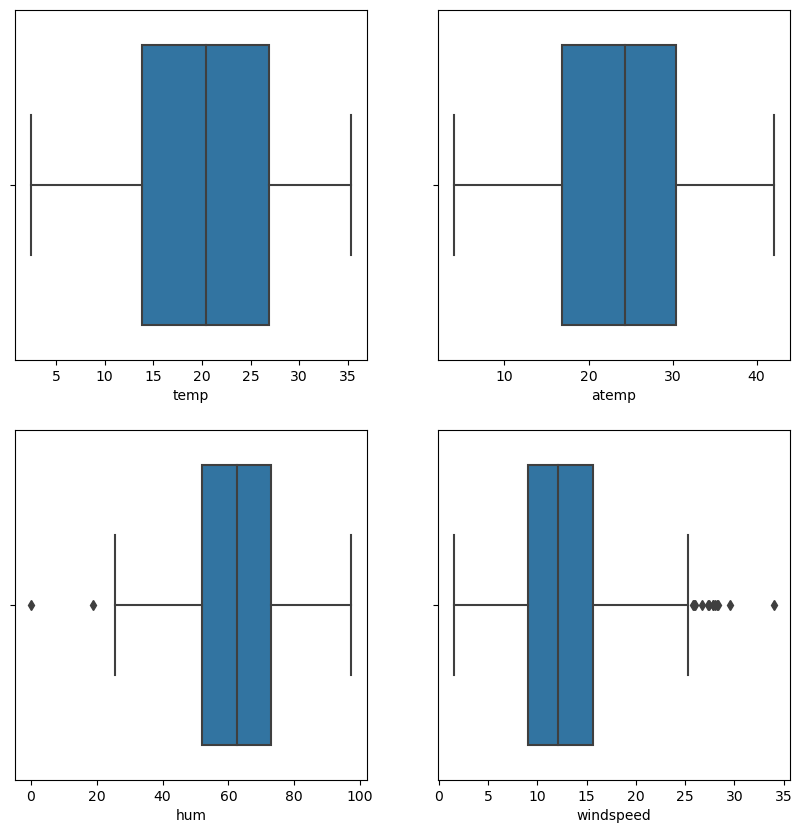

In [78]:
check_outliers(df,["temp","atemp","hum","windspeed"])

In [79]:
# no such vague outliers present

In [80]:
# check EDA

In [81]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [82]:
# seperating columns data into numerical_columns and categorical_columns
categorical_columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']
numerical_columns=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
target_variable='cnt'

In [83]:
# 1a. Categorical Variables

In [84]:
# first renaming categoried entries for better understanding of columns after dummy variable creation

In [85]:
df.weathersit.replace({1:'clear',2:'cloudy',3:'light_rain',4:'heavy_rain'},inplace = True)
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)
df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)


In [86]:
def check_bivariate_boxplt(df,columns,value):
    plt.figure(figsize=(20, 20))
    for i,col in enumerate(columns):
        plt.subplot(3,3,i+1)
        sns.boxplot(data=df, x=col, y=value)
    

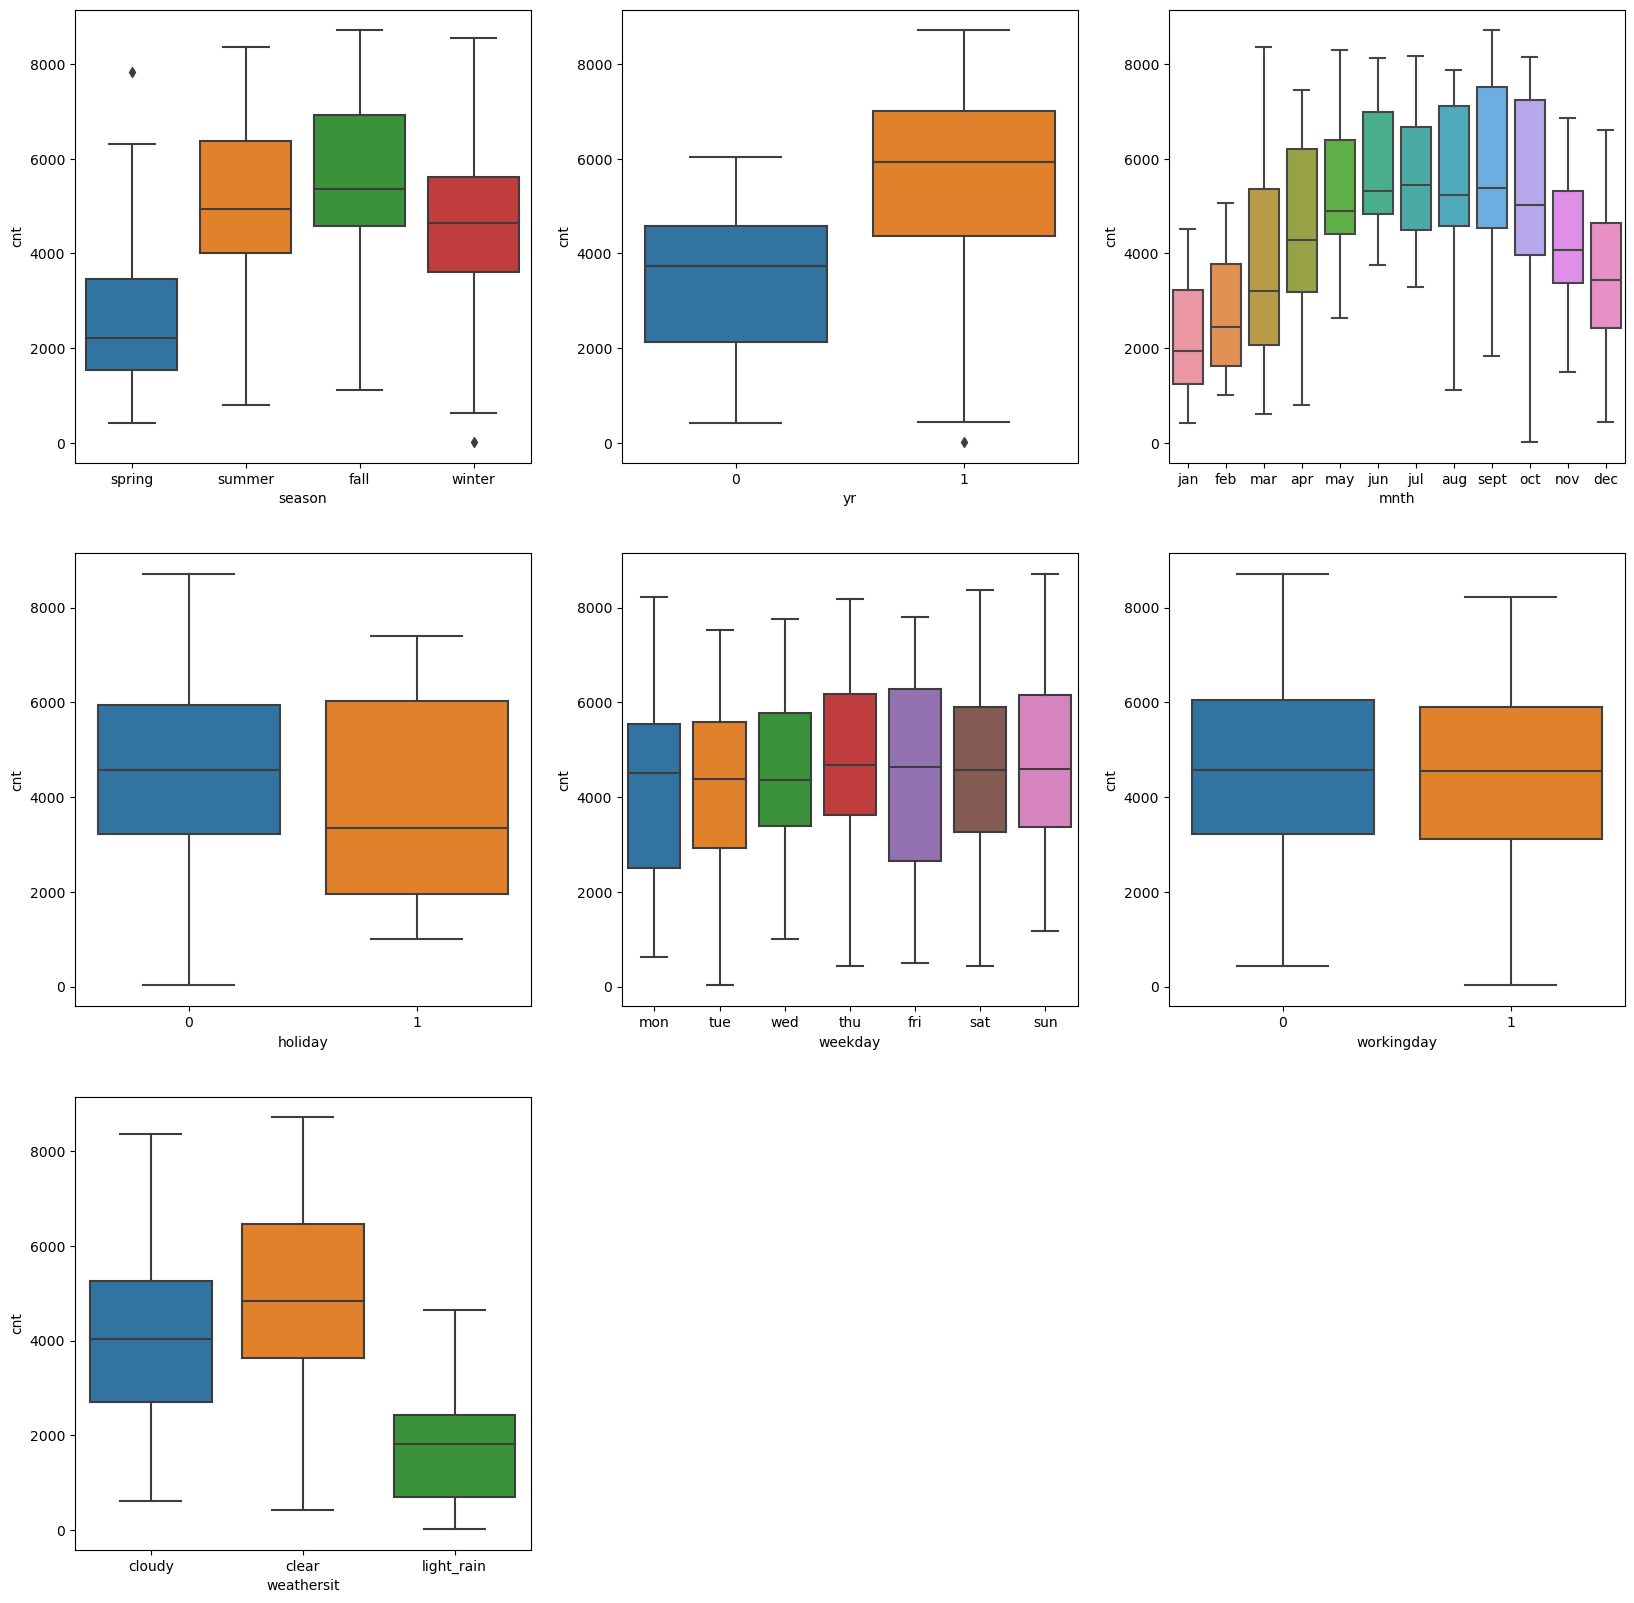

In [87]:
check_bivariate_boxplt(df,categorical_columns,target_variable)

In [88]:
# thus from here we can see
# 1. fall season has the highest median no of customers
# 2. Year 2019 has more no of customers
# 3. September month has the highest median no of customers which is also seen in season fall.
# 4. Holiday has more no of customers
# 5. While the day of week or working day does not have a great different between median no of customers
# 6. Customer are likely to increase on a clear day

In [89]:
# 1a. Numerical Variables

<Figure size 2000x1500 with 0 Axes>

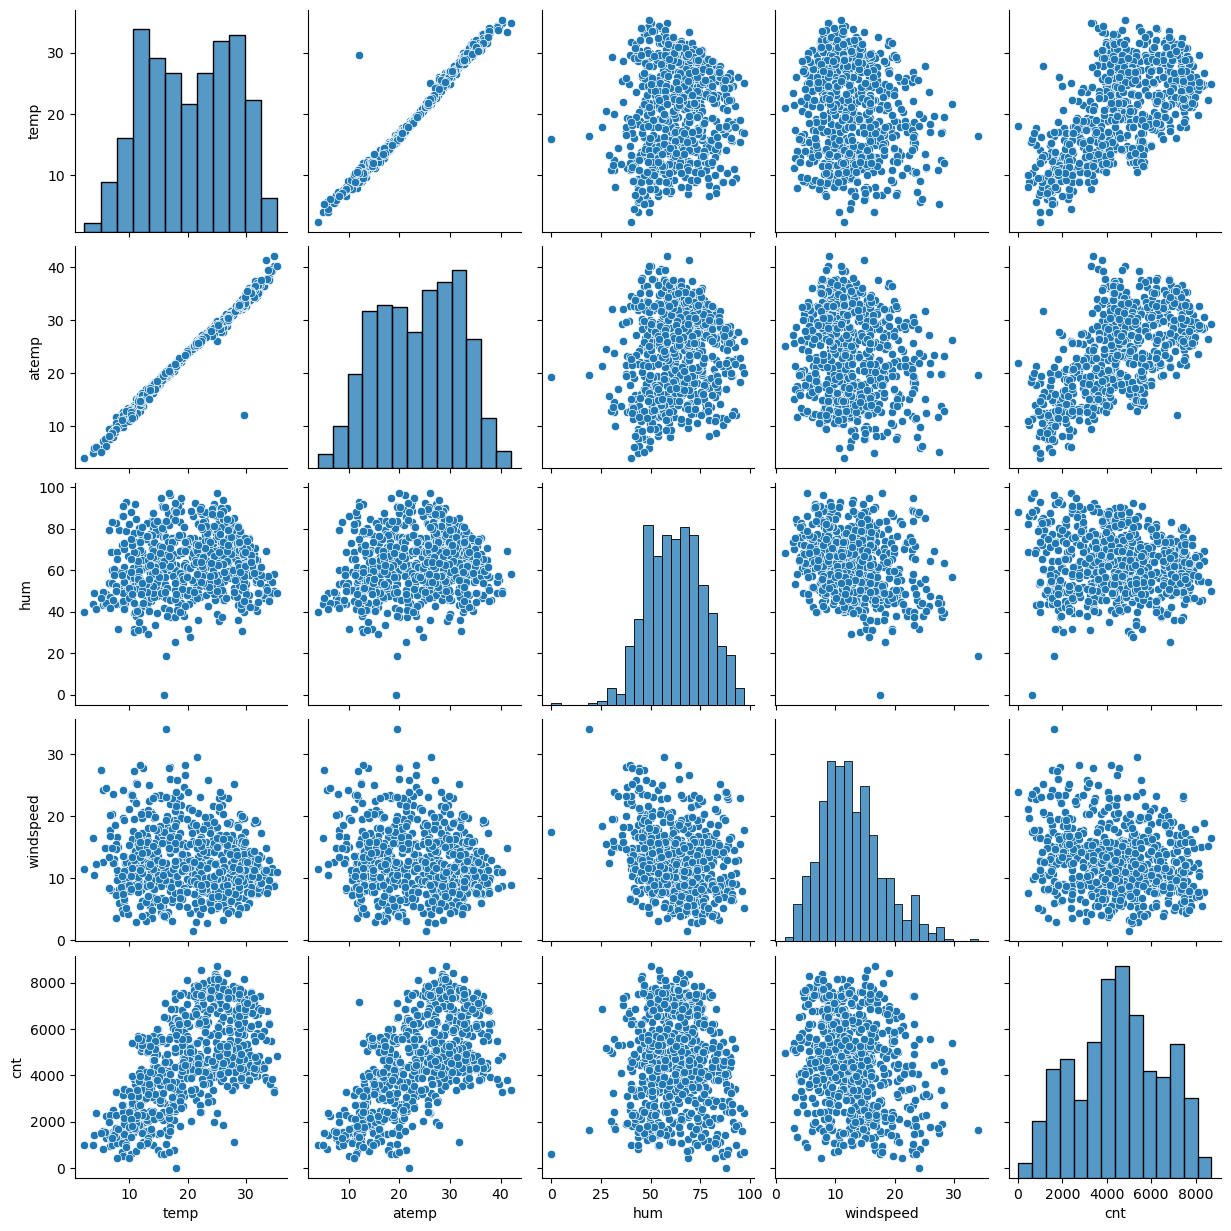

In [90]:
plt.figure(figsize=(20,15))
sns.pairplot(df[numerical_columns])
plt.show()

<AxesSubplot:>

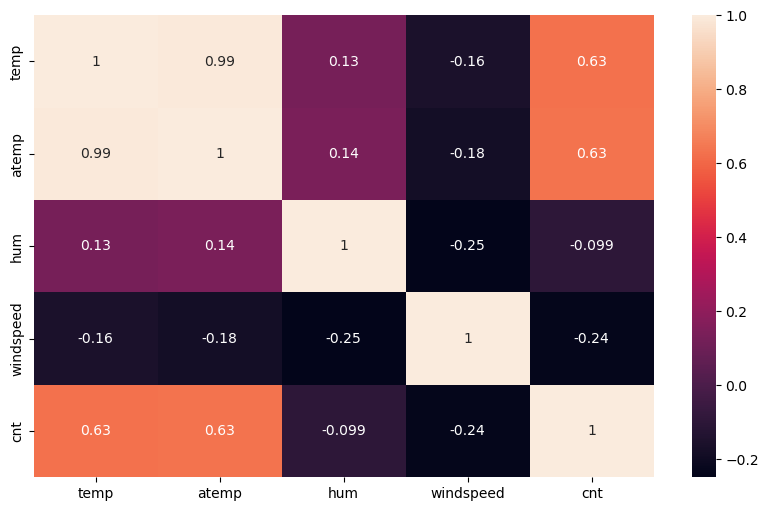

In [91]:
# creating correlation heat map between remainging variable to see multicolinearity
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_columns].corr(),annot=True,annot_kws={"size":10})

In [92]:
# from here we can see that
# 1. Humidity data points are scattered but show a overall positive co-relation with cnt
# 2. Windspeed data points are scattered but show a overall negattive co-relation with cnt
# 3. Temp and atemp data points are more together but show a positive co-relation with cnt

In [93]:
df

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0    spring   0  jan        0     mon           1     cloudy  14.110847   
1    spring   0  jan        0     tue           1     cloudy  14.902598   
2    spring   0  jan        0     wed           1      clear   8.050924   
3    spring   0  jan        0     thu           1      clear   8.200000   
4    spring   0  jan        0     fri           1      clear   9.305237   
..      ...  ..  ...      ...     ...         ...        ...        ...   
725  spring   1  dec        0     fri           1     cloudy  10.420847   
726  spring   1  dec        0     sat           0     cloudy  10.386653   
727  spring   1  dec        0     sun           0     cloudy  10.386653   
728  spring   1  dec        0     mon           1      clear  10.489153   
729  spring   1  dec        0     tue           1     cloudy   8.849153   

        atemp      hum  windspeed   cnt  
0    18.18125  80.5833  10.749882   985  
1    17.68695  69.6087  16.652113   801  
2     9.47025  43.7273  16.636703  1349  
3    10.60610  59.0435  10.739832  1562  
4    11.46350  43.6957  12.522300  1600  
..        ...      ...        ...   ...  
725  11.33210  65.2917  23.458911  2114  
726  12.75230  59.0000  10.416557  3095  
727  12.12000  75.2917   8.333661  1341  
728  11.58500  48.3333  23.500518  1796  
729  11.17435  57.7500  10.374682  2729  

[730 rows x 12 columns]

In [94]:
# model preparation

In [95]:
# Step 1:
# converting categorical variables having more than 2 unique values into dummy variables
# categorical variables are 'season','yr','weekday','weathersit'
# check no of unique values in these columns
df["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [96]:
df["mnth"].value_counts()

jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: mnth, dtype: int64

In [97]:
df["weekday"].value_counts()

mon    105
tue    105
wed    104
thu    104
fri    104
sat    104
sun    104
Name: weekday, dtype: int64

In [98]:
df["weathersit"].value_counts()

clear         463
cloudy        246
light_rain     21
Name: weathersit, dtype: int64

In [99]:
# we see that coulmns "season","mnth","weekday" has 4,12, 7 unique values which are inline with the data dic
# for the "weathersit" column we have 3 unique calue sin the data but in the data dic we have 4.
# thus while creating dummy variable we will not drop_first for the 'weathersit' column


In [100]:
df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1     cloudy  14.110847   
1  spring   0  jan        0     tue           1     cloudy  14.902598   
2  spring   0  jan        0     wed           1      clear   8.050924   
3  spring   0  jan        0     thu           1      clear   8.200000   
4  spring   0  jan        0     fri           1      clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [101]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [102]:
df

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0     0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1     0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350  43.6957  12.522300  1600   
..   ..      ...         ...        ...       ...      ...        ...   ...   
725   1        0           1  10.420847  11.33210  65.2917  23.458911  2114   
726   1        0           0  10.386653  12.75230  59.0000  10.416557  3095   
727   1        0           0  10.386653  12.12000  75.2917   8.333661  1341   
728   1        0           1  10.489153  11.58500  48.3333  23.500518  1796   
729   1        0           1   8.849153  11.17435  57.7500  10.374682  2729   

     season_spring  season_summer  ...  mnth_sept  weekday_mon  weekday_sat  \
0                1              0  ...          0            1            0   
1                1              0  ...          0            0            0   
2                1              0  ...          0            0            0   
3                1              0  ...          0            0            0   
4                1              0  ...          0            0            0   
..             ...            ...  ...        ...          ...          ...   
725              1              0  ...          0            0            0   
726              1              0  ...          0            0            1   
727              1              0  ...          0            0            0   
728              1              0  ...          0            1            0   
729              1              0  ...          0            0            0   

     weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_clear  \
0              0            0            0            0                 0   
1              0            0            1            0                 0   
2              0            0            0            1                 1   
3              0            1            0            0                 1   
4              0            0            0            0                 1   
..           ...          ...          ...          ...               ...   
725            0            0            0            0                 0   
726            0            0            0            0                 0   
727            1            0            0            0                 0   
728            0            0            0            0                 1   
729            0            0            1            0                 0   

     weathersit_cloudy  weathersit_light_rain  
0                    1                      0  
1                    1                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0  
..                 ...                    ...  
725                  1                      0  
726                  1                      0  
727                  1                      0  
728                  0                      0  
729                  1                      0  

[730 rows x 31 columns]

In [103]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_clear', 'weathersit_cloudy',
       'weathersit_light_rain'],
      dtype='object')

In [104]:
# renaming the columns for better representation
#df.rename(columns={"weekday_1":"monday","weekday_1":"tuesday","weekday_1":"wednesday",
#                   "weekday_1":thursday,"weekday_1":friday,"weekday_1":saturday,"weekday_1":sunday})

In [105]:
df

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0     0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1     0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350  43.6957  12.522300  1600   
..   ..      ...         ...        ...       ...      ...        ...   ...   
725   1        0           1  10.420847  11.33210  65.2917  23.458911  2114   
726   1        0           0  10.386653  12.75230  59.0000  10.416557  3095   
727   1        0           0  10.386653  12.12000  75.2917   8.333661  1341   
728   1        0           1  10.489153  11.58500  48.3333  23.500518  1796   
729   1        0           1   8.849153  11.17435  57.7500  10.374682  2729   

     season_spring  season_summer  ...  mnth_sept  weekday_mon  weekday_sat  \
0                1              0  ...          0            1            0   
1                1              0  ...          0            0            0   
2                1              0  ...          0            0            0   
3                1              0  ...          0            0            0   
4                1              0  ...          0            0            0   
..             ...            ...  ...        ...          ...          ...   
725              1              0  ...          0            0            0   
726              1              0  ...          0            0            1   
727              1              0  ...          0            0            0   
728              1              0  ...          0            1            0   
729              1              0  ...          0            0            0   

     weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_clear  \
0              0            0            0            0                 0   
1              0            0            1            0                 0   
2              0            0            0            1                 1   
3              0            1            0            0                 1   
4              0            0            0            0                 1   
..           ...          ...          ...          ...               ...   
725            0            0            0            0                 0   
726            0            0            0            0                 0   
727            1            0            0            0                 0   
728            0            0            0            0                 1   
729            0            0            1            0                 0   

     weathersit_cloudy  weathersit_light_rain  
0                    1                      0  
1                    1                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0  
..                 ...                    ...  
725                  1                      0  
726                  1                      0  
727                  1                      0  
728                  0                      0  
729                  1                      0  

[730 rows x 31 columns]

In [106]:
df.shape

(730, 31)

In [107]:
# Step 2
#splitting the dataset into testing and training datasets 70% -trainging,30% testing
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [108]:
# check if splitting is proper
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [109]:
# Step 3:
#scaling the numerical/continous variables
scaler=MinMaxScaler()
numerical_columns=["temp","atemp","hum","windspeed"]
df_train[numerical_columns]=scaler.fit_transform(df_train[numerical_columns])

In [110]:
df_train

yr  holiday  workingday      temp     atemp       hum  windspeed   cnt  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686  7216   
426   1        0           0  0.442393  0.438975  0.640189   0.255342  4066   
728   1        0           1  0.245101  0.200348  0.498067   0.663106  1796   
482   1        0           0  0.395666  0.391735  0.504508   0.188475  4220   
111   0        0           0  0.345824  0.318819  0.751824   0.380981  1683   
..   ..      ...         ...       ...       ...       ...        ...   ...   
578   1        0           1  0.863973  0.824359  0.679690   0.187140  7261   
53    0        0           1  0.202618  0.218747  0.435939   0.111379  1917   
350   0        0           1  0.248216  0.223544  0.577930   0.431816  2739   
79    0        0           1  0.462664  0.434043  0.759870   0.529881  2077   
520   1        0           1  0.600225  0.586515  0.632030   0.359599  7001   

     season_spring  season_summer  ...  mnth_sept  weekday_mon  weekday_sat  \
576              0              0  ...          0            0            0   
426              1              0  ...          0            0            0   
728              1              0  ...          0            1            0   
482              0              1  ...          0            0            0   
111              0              1  ...          0            0            0   
..             ...            ...  ...        ...          ...          ...   
578              0              0  ...          0            0            0   
53               1              0  ...          0            0            0   
350              0              0  ...          0            1            0   
79               0              1  ...          0            0            0   
520              0              1  ...          0            0            0   

     weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_clear  \
576            0            0            0            1                 1   
426            1            0            0            0                 0   
728            0            0            0            0                 1   
482            1            0            0            0                 0   
111            1            0            0            0                 0   
..           ...          ...          ...          ...               ...   
578            0            0            0            0                 1   
53             0            0            0            0                 1   
350            0            0            0            0                 0   
79             0            0            0            1                 0   
520            0            0            0            1                 0   

     weathersit_cloudy  weathersit_light_rain  
576                  0                      0  
426                  1                      0  
728                  0                      0  
482                  1                      0  
111                  1                      0  
..                 ...                    ...  
578                  0                      0  
53                   0                      0  
350                  1                      0  
79                   1                      0  
520                  1                      0  

[510 rows x 31 columns]

In [111]:
# check if scaling is proper
df_train[numerical_columns].describe()

temp       atemp         hum   windspeed
count  510.000000  510.000000  510.000000  510.000000
mean     0.537440    0.513156    0.650480    0.320883
std      0.225858    0.212410    0.145846    0.169803
min      0.000000    0.000000    0.000000    0.000000
25%      0.339853    0.332086    0.538643    0.199179
50%      0.542596    0.529718    0.653714    0.296763
75%      0.735215    0.688457    0.754830    0.414447
max      1.000000    1.000000    1.000000    1.000000

In [112]:
#Step 4:
# training the model

In [113]:
Y_train=df_train[["cnt"]]
df_train.drop(["cnt"],axis=1,inplace=True)
X_train=df_train.copy()

In [114]:
Y_train

cnt
576  7216
426  4066
728  1796
482  4220
111  1683
..    ...
578  7261
53   1917
350  2739
79   2077
520  7001

[510 rows x 1 columns]

In [115]:
# defining function to create linear regression model
def statsmodel_model_creation(columns,X_train,Y_train):
    X_train_sm=sm.add_constant(X_train[columns])
    #print(X_train_sm)
    lr=sm.OLS(Y_train.astype("float"),X_train_sm.astype("float"))
    lr_model=lr.fit()
    #print(lr_model.summary())
    return lr_model,X_train_sm

In [116]:
# defining function to calculate VIF
def calculate_vif(columns,X_train):
    X_train=X_train[columns]
    vif=pd.DataFrame()
    vif['features']=X_train.columns
    vif['VIF']=[variance_inflation_factor(X_train[columns],i) for i in range(X_train[columns].shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    print(vif)
    return vif

In [117]:
columns=X_train.columns
statsmodel_model_creation(columns,X_train,Y_train)

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x172e97e9610>,
      const  yr  holiday  workingday      temp     atemp       hum  windspeed  \
 576    1.0   1        0           1  0.815169  0.766351  0.725633   0.264686   
 426    1.0   1        0           0  0.442393  0.438975  0.640189   0.255342   
 728    1.0   1        0           1  0.245101  0.200348  0.498067   0.663106   
 482    1.0   1        0           0  0.395666  0.391735  0.504508   0.188475   
 111    1.0   0        0           0  0.345824  0.318819  0.751824   0.380981   
 ..     ...  ..      ...         ...       ...       ...       ...        ...   
 578    1.0   1        0           1  0.863973  0.824359  0.679690   0.187140   
 53     1.0   0        0           1  0.202618  0.218747  0.435939   0.111379   
 350    1.0   0        0           1  0.248216  0.223544  0.577930   0.431816   
 79     1.0   0        0           1  0.462664  0.434043  0.759870   0.529881   
 520    1.0   1        0   

In [118]:
columns=X_train.columns
calculate_vif(columns,X_train)

                 features     VIF
27       weathersit_clear  289.67
28      weathersit_cloudy  164.60
3                    temp   66.83
2              workingday   66.33
4                   atemp   55.81
23            weekday_sun   38.79
22            weekday_sat   36.99
29  weathersit_light_rain   15.32
7           season_spring   10.77
9           season_winter    9.47
8           season_summer    8.29
1                 holiday    6.80
18               mnth_nov    6.79
10               mnth_aug    6.48
19               mnth_oct    6.47
13               mnth_jan    5.91
11               mnth_dec    5.67
14               mnth_jul    5.66
20              mnth_sept    4.91
12               mnth_feb    4.41
16               mnth_mar    3.47
15               mnth_jun    2.87
17               mnth_may    2.25
5                     hum    2.06
25            weekday_tue    1.79
21            weekday_mon    1.78
24            weekday_thu    1.76
26            weekday_wed    1.74
6             

features     VIF
27       weathersit_clear  289.67
28      weathersit_cloudy  164.60
3                    temp   66.83
2              workingday   66.33
4                   atemp   55.81
23            weekday_sun   38.79
22            weekday_sat   36.99
29  weathersit_light_rain   15.32
7           season_spring   10.77
9           season_winter    9.47
8           season_summer    8.29
1                 holiday    6.80
18               mnth_nov    6.79
10               mnth_aug    6.48
19               mnth_oct    6.47
13               mnth_jan    5.91
11               mnth_dec    5.67
14               mnth_jul    5.66
20              mnth_sept    4.91
12               mnth_feb    4.41
16               mnth_mar    3.47
15               mnth_jun    2.87
17               mnth_may    2.25
5                     hum    2.06
25            weekday_tue    1.79
21            weekday_mon    1.78
24            weekday_thu    1.76
26            weekday_wed    1.74
6               windspeed    1.31
0                      yr    1.06

In [119]:
X_train.shape

(510, 30)

In [120]:
# step 5
# using RFE to select top features automatically
lm=LinearRegression()
lm.fit(X_train,Y_train)
rfe=RFE(lm,n_features_to_select=18) # selecting 60% of total feature to start with
rfe=rfe.fit(X_train,Y_train)

In [121]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', False, 3),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 5),
 ('weekday_wed', False, 9),
 ('weathersit_clear', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_light_rain', True, 1)]

In [122]:
# seperate rfe selected columns
rfe_columns=X_train.columns[rfe.support_]

In [123]:
rfe_columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_clear',
       'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

In [124]:
# Step 6
# creating model

In [125]:
# Model 1 : Considering all RFE selected features

In [126]:
#X_train_rfe=X_train[rfe_columns]
lr_model1,X_train_sm1=statsmodel_model_creation(rfe_columns,X_train,Y_train)
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.7
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          3.85e-187
Time:                        01:28:58   Log-Likelihood:                -4110.2
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     492   BIC:                             8333.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1520.31

In [127]:
calculate_vif(rfe_columns,X_train)

                 features    VIF
2                    temp  59.16
3                   atemp  53.88
15       weathersit_clear  53.66
16      weathersit_cloudy  34.76
6           season_spring   5.79
17  weathersit_light_rain   4.30
8           season_winter   3.98
7           season_summer   2.94
11               mnth_jan   2.37
4                     hum   1.93
10               mnth_feb   1.86
13               mnth_nov   1.81
9                mnth_dec   1.66
12               mnth_jul   1.50
14              mnth_sept   1.35
5               windspeed   1.26
1                 holiday   1.04
0                      yr   1.04


features    VIF
2                    temp  59.16
3                   atemp  53.88
15       weathersit_clear  53.66
16      weathersit_cloudy  34.76
6           season_spring   5.79
17  weathersit_light_rain   4.30
8           season_winter   3.98
7           season_summer   2.94
11               mnth_jan   2.37
4                     hum   1.93
10               mnth_feb   1.86
13               mnth_nov   1.81
9                mnth_dec   1.66
12               mnth_jul   1.50
14              mnth_sept   1.35
5               windspeed   1.26
1                 holiday   1.04
0                      yr   1.04

In [128]:
# model 2 :
# from above model summary we can see that the signifance of 'atemp' is very low
# thus dropping 'atemp' feature and recreating the model

In [129]:
selected_columns=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_clear',
       'weathersit_cloudy', 'weathersit_light_rain']
lr_model2,X_train_sm2=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          2.94e-188
Time:                        01:28:58   Log-Likelihood:                -4110.2
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     493   BIC:                             8326.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1518.70

In [130]:
# thus by dropping 'atemp' column we can see that the r-squared value remained the same while the adjusted r squared value increased very little

In [131]:
calculate_vif(selected_columns,X_train)

                 features    VIF
14       weathersit_clear  53.61
15      weathersit_cloudy  34.72
5           season_spring   5.69
2                    temp   4.73
16  weathersit_light_rain   4.28
7           season_winter   3.84
6           season_summer   2.82
10               mnth_jan   2.37
3                     hum   1.92
9                mnth_feb   1.86
12               mnth_nov   1.81
8                mnth_dec   1.66
11               mnth_jul   1.49
13              mnth_sept   1.34
4               windspeed   1.21
1                 holiday   1.04
0                      yr   1.04


features    VIF
14       weathersit_clear  53.61
15      weathersit_cloudy  34.72
5           season_spring   5.69
2                    temp   4.73
16  weathersit_light_rain   4.28
7           season_winter   3.84
6           season_summer   2.82
10               mnth_jan   2.37
3                     hum   1.92
9                mnth_feb   1.86
12               mnth_nov   1.81
8                mnth_dec   1.66
11               mnth_jul   1.49
13              mnth_sept   1.34
4               windspeed   1.21
1                 holiday   1.04
0                      yr   1.04

In [132]:
# model 3 :
# from above model summary we can see that the signifance of 'mnth_feb' is very low
# thus dropping 'atemp' feature and recreating the model

In [133]:
selected_columns=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_clear',
       'weathersit_cloudy', 'weathersit_light_rain']
lr_model3,X_train_sm3=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          8.15e-189
Time:                        01:28:58   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1446.81

In [134]:
# thus by dropping 'mnth_feb' column we cannot see significant change in r-squared value and adjusted r squared value

In [135]:
# now since all the p values are below 0.05 mark lets check VIF and drop high VIF features

In [136]:
calculate_vif(selected_columns,X_train)

                 features    VIF
13       weathersit_clear  51.61
14      weathersit_cloudy  33.67
5           season_spring   5.27
2                    temp   4.42
15  weathersit_light_rain   4.21
7           season_winter   3.83
6           season_summer   2.77
3                     hum   1.92
11               mnth_nov   1.77
9                mnth_jan   1.68
8                mnth_dec   1.50
10               mnth_jul   1.49
12              mnth_sept   1.34
4               windspeed   1.21
0                      yr   1.04
1                 holiday   1.03


features    VIF
13       weathersit_clear  51.61
14      weathersit_cloudy  33.67
5           season_spring   5.27
2                    temp   4.42
15  weathersit_light_rain   4.21
7           season_winter   3.83
6           season_summer   2.77
3                     hum   1.92
11               mnth_nov   1.77
9                mnth_jan   1.68
8                mnth_dec   1.50
10               mnth_jul   1.49
12              mnth_sept   1.34
4               windspeed   1.21
0                      yr   1.04
1                 holiday   1.03

In [137]:
# thus we can see that the VIF of 'weathersit_clear' is quite high

In [138]:
# model 4 :
# thus we can see that the VIF of 'weathersit_clear' is quite high
# thus dropping 'weathersit_clear' feature and recreating the model

In [139]:
selected_columns=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain']
lr_model4,X_train_sm4=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          8.15e-189
Time:                        01:28:58   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2800.54

In [140]:
# thus by dropping 'weathersit_clear' column we can see not significant change in r-squared value and adjusted r squared value

In [141]:
# now since all the p values are below 0.05 mark lets check VIF and drop high VIF features

In [142]:
calculate_vif(selected_columns,X_train)

                 features    VIF
3                     hum  30.89
2                    temp  17.79
4               windspeed   4.72
5           season_spring   4.37
7           season_winter   4.06
6           season_summer   2.82
13      weathersit_cloudy   2.32
0                      yr   2.09
11               mnth_nov   1.85
9                mnth_jan   1.75
10               mnth_jul   1.59
8                mnth_dec   1.56
12              mnth_sept   1.41
14  weathersit_light_rain   1.28
1                 holiday   1.06


features    VIF
3                     hum  30.89
2                    temp  17.79
4               windspeed   4.72
5           season_spring   4.37
7           season_winter   4.06
6           season_summer   2.82
13      weathersit_cloudy   2.32
0                      yr   2.09
11               mnth_nov   1.85
9                mnth_jan   1.75
10               mnth_jul   1.59
8                mnth_dec   1.56
12              mnth_sept   1.41
14  weathersit_light_rain   1.28
1                 holiday   1.06

In [143]:
# model 5 :
# thus we can see that the VIF of 'hum' is quite high
# thus dropping 'hum' feature and recreating the model

In [144]:
selected_columns=['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain']
lr_model5,X_train_sm5=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          4.75e-186
Time:                        01:28:58   Log-Likelihood:                -4120.9
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     495   BIC:                             8335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2151.79

In [145]:
# thus by dropping 'hum' column we can see not significant change in r-squared value and adjusted r squared value

In [146]:
# now since all the p values are below 0.05 mark lets check VIF and drop high VIF features

In [147]:
calculate_vif(selected_columns,X_train)

                 features   VIF
2                    temp  5.17
3               windspeed  4.67
6           season_winter  2.95
4           season_spring  2.89
5           season_summer  2.24
0                      yr  2.07
10               mnth_nov  1.81
8                mnth_jan  1.66
9                mnth_jul  1.59
12      weathersit_cloudy  1.57
7                mnth_dec  1.47
11              mnth_sept  1.35
13  weathersit_light_rain  1.09
1                 holiday  1.06


features   VIF
2                    temp  5.17
3               windspeed  4.67
6           season_winter  2.95
4           season_spring  2.89
5           season_summer  2.24
0                      yr  2.07
10               mnth_nov  1.81
8                mnth_jan  1.66
9                mnth_jul  1.59
12      weathersit_cloudy  1.57
7                mnth_dec  1.47
11              mnth_sept  1.35
13  weathersit_light_rain  1.09
1                 holiday  1.06

In [148]:
# model 6 :
# thus we can see that the VIF of 'temp' is quite high
# thus dropping 'temp' feature and recreating the model

In [149]:
selected_columns=['yr', 'holiday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain']
lr_model6,X_train_sm6=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          1.82e-159
Time:                        01:28:58   Log-Likelihood:                -4186.9
No. Observations:                 510   AIC:                             8402.
Df Residuals:                     496   BIC:                             8461.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5197.03

In [150]:
# thus by dropping 'temp' column we can see not significant drop in r-squared value and adjusted r squared value
# thus its not appropriate to drop temp directly
# Also from business/user behaviour temp also carries a lot of weightage in decision making

In [151]:
# now since all the p values of 'mnth_jul' is high
# lets also check VIF

In [152]:
calculate_vif(selected_columns,X_train)

                 features   VIF
2               windspeed  3.89
3           season_spring  2.89
5           season_winter  2.85
4           season_summer  2.02
0                      yr  1.83
9                mnth_nov  1.80
7                mnth_jan  1.64
11      weathersit_cloudy  1.53
6                mnth_dec  1.46
8                mnth_jul  1.20
10              mnth_sept  1.18
12  weathersit_light_rain  1.09
1                 holiday  1.06


features   VIF
2               windspeed  3.89
3           season_spring  2.89
5           season_winter  2.85
4           season_summer  2.02
0                      yr  1.83
9                mnth_nov  1.80
7                mnth_jan  1.64
11      weathersit_cloudy  1.53
6                mnth_dec  1.46
8                mnth_jul  1.20
10              mnth_sept  1.18
12  weathersit_light_rain  1.09
1                 holiday  1.06

In [153]:
# model 7 :
# thus we can see that the p value of 'mnth_jul' is  high
# thus dropping 'mnth_jul' feature  and re addinf 'temp' feature and recreating the model

In [154]:
selected_columns=['yr', 'holiday', 'windspeed', 'season_spring','temp',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain']
lr_model7,X_train_sm7=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          1.23e-185
Time:                        01:28:59   Log-Likelihood:                -4124.7
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2089.45

In [155]:
# thus by dropping 'mnth_jul' and adding 'temp' column we can see  significant increase in r-squared value and adjusted r squared value

In [156]:
# now since all the p values are below 0.05 mark lets check VIF and drop high VIF features

In [157]:
calculate_vif(selected_columns,X_train)

                 features   VIF
2               windspeed  4.66
4                    temp  3.88
6           season_winter  2.77
3           season_spring  2.76
0                      yr  2.07
5           season_summer  1.91
9                mnth_nov  1.81
8                mnth_jan  1.65
11      weathersit_cloudy  1.56
7                mnth_dec  1.46
10              mnth_sept  1.25
12  weathersit_light_rain  1.09
1                 holiday  1.06


features   VIF
2               windspeed  4.66
4                    temp  3.88
6           season_winter  2.77
3           season_spring  2.76
0                      yr  2.07
5           season_summer  1.91
9                mnth_nov  1.81
8                mnth_jan  1.65
11      weathersit_cloudy  1.56
7                mnth_dec  1.46
10              mnth_sept  1.25
12  weathersit_light_rain  1.09
1                 holiday  1.06

<AxesSubplot:>

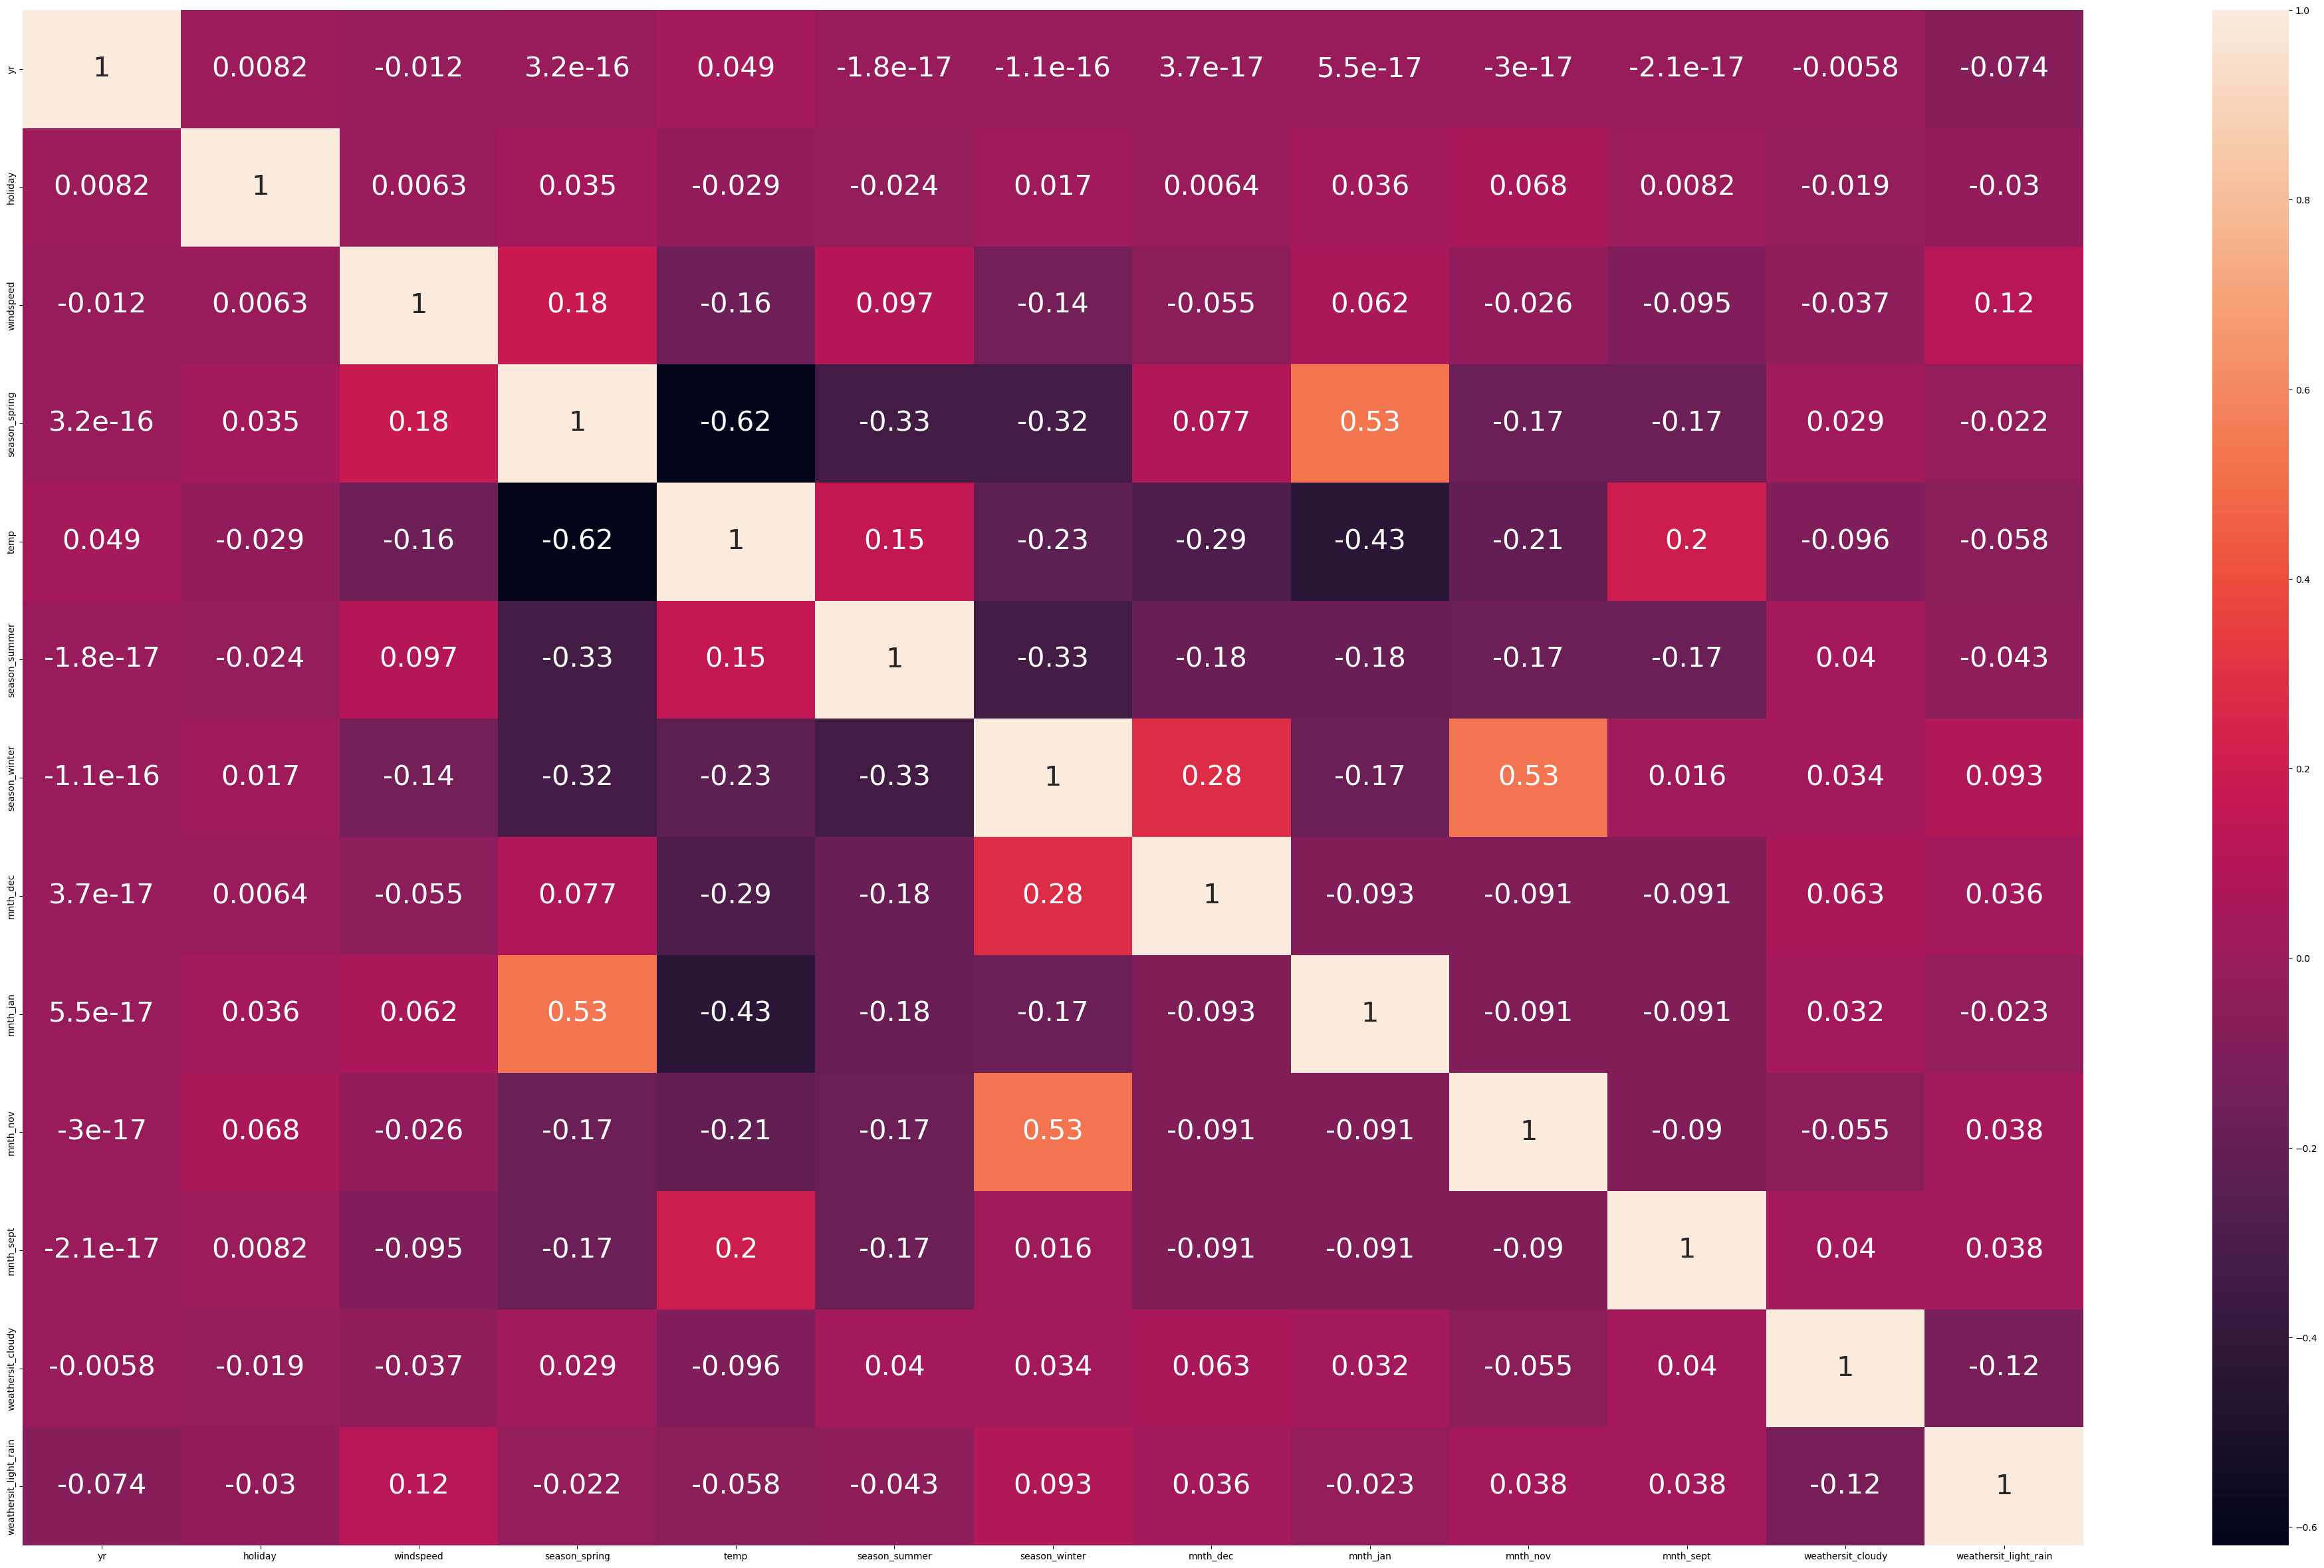

In [158]:
# creating correlation heat map between remainging variable to see multicolinearity
plt.figure(figsize=(50,30))
sns.heatmap(df[['yr', 'holiday', 'windspeed', 'season_spring','temp',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain']].corr(),annot=True,annot_kws={"size":30})

In [159]:
# thus we can see there is high correlation between 
# 1.'mnth_jan' and 'season_spring'
# 2.'mnth_nov' and 'season_winter'

In [160]:
# model 8a:
# the p value of season spring and mnth jan is the same
# the VIF of "season_spring" is higher than "month_jan"
# thus dropping 'season_spring' first feature recreating the model

In [161]:
selected_columns=['yr', 'holiday', 'windspeed','temp',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain']
lr_model8a,X_train_sm8a=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model8a.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.3
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          4.17e-185
Time:                        01:29:00   Log-Likelihood:                -4128.7
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     497   BIC:                             8338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1487.23

In [162]:
# thus by dropping "season_spring" column we cannot see  significant change in r-squared value and adjusted r squared value

In [163]:
# now since all the p values are below 0.05 mark lets check VIF and drop high VIF features

In [164]:
calculate_vif(selected_columns,X_train)

                 features   VIF
3                    temp  3.81
2               windspeed  3.40
5           season_winter  2.44
0                      yr  2.04
8                mnth_nov  1.81
4           season_summer  1.63
10      weathersit_cloudy  1.54
6                mnth_dec  1.40
9               mnth_sept  1.23
7                mnth_jan  1.22
11  weathersit_light_rain  1.09
1                 holiday  1.05


features   VIF
3                    temp  3.81
2               windspeed  3.40
5           season_winter  2.44
0                      yr  2.04
8                mnth_nov  1.81
4           season_summer  1.63
10      weathersit_cloudy  1.54
6                mnth_dec  1.40
9               mnth_sept  1.23
7                mnth_jan  1.22
11  weathersit_light_rain  1.09
1                 holiday  1.05

In [165]:
# model 8b:
# the p value of season spring and mnth jan is the same
# thus dropping 'month_jan' feature recreating the model

In [166]:
selected_columns=['yr', 'holiday', 'windspeed','temp','season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_nov', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain']
lr_model8b,X_train_sm8b=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model8b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.3
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          4.28e-185
Time:                        01:29:01   Log-Likelihood:                -4128.7
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     497   BIC:                             8339.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1843.58

In [167]:
# thus by dropping "mnth_jan" column we cannot see  significant change in r-squared value and adjusted r squared value

In [168]:
# now since all the p values are below 0.05 mark lets check VIF and drop high VIF features

In [169]:
calculate_vif(selected_columns,X_train)

                 features   VIF
2               windspeed  4.65
3                    temp  3.86
6           season_winter  2.74
0                      yr  2.07
4           season_spring  2.04
5           season_summer  1.91
8                mnth_nov  1.81
10      weathersit_cloudy  1.55
7                mnth_dec  1.42
9               mnth_sept  1.25
11  weathersit_light_rain  1.09
1                 holiday  1.06


features   VIF
2               windspeed  4.65
3                    temp  3.86
6           season_winter  2.74
0                      yr  2.07
4           season_spring  2.04
5           season_summer  1.91
8                mnth_nov  1.81
10      weathersit_cloudy  1.55
7                mnth_dec  1.42
9               mnth_sept  1.25
11  weathersit_light_rain  1.09
1                 holiday  1.06

<AxesSubplot:>

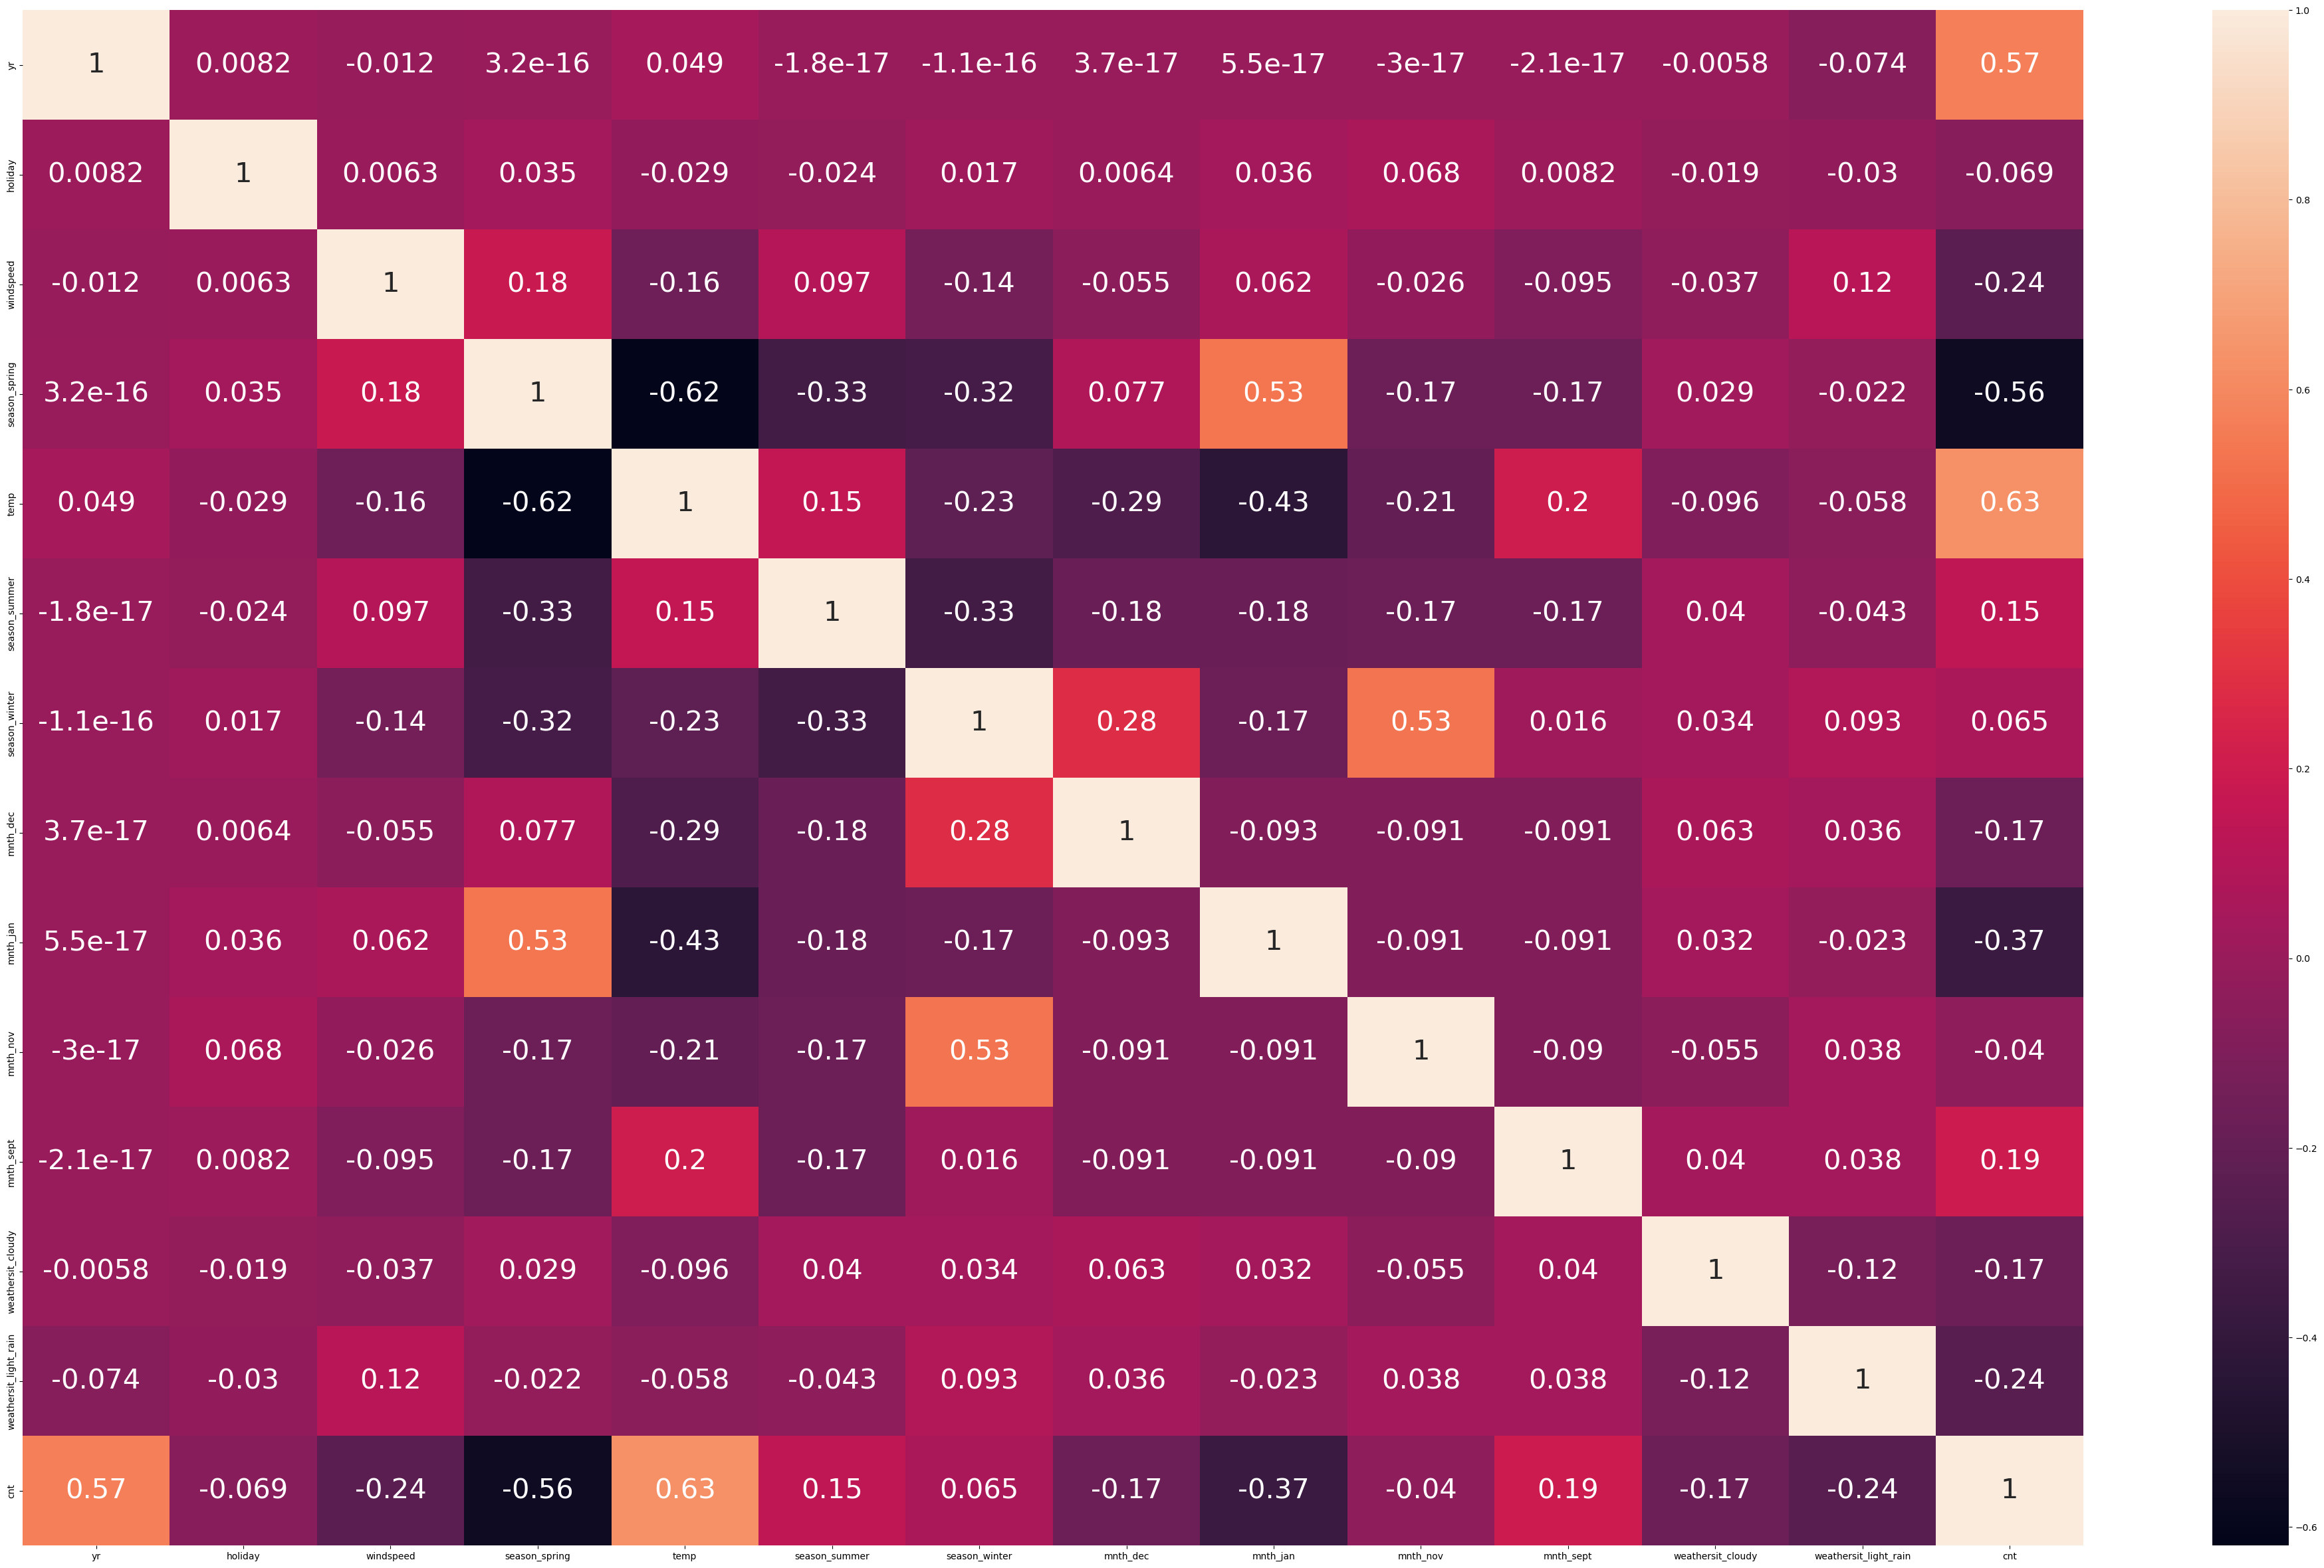

In [170]:
# thus will check correaltion plot to check which feature between 'season_spring' and 'mnth_jan' is more correlated to the 'cnt'.
plt.figure(figsize=(50,30))
sns.heatmap(df[['yr', 'holiday', 'windspeed', 'season_spring','temp',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain','cnt']].corr(),annot=True,annot_kws={"size":30})

In [171]:
# thus we will keep season_spring since is more correlated to the ouptut.

In [172]:
# model 9a:
# the p value of  mnth nov is more than season winter
# thus dropping 'mnth nov' feature and recreating the model

In [173]:
selected_columns=['yr', 'holiday', 'windspeed','temp','season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain']
lr_model9a,X_train_sm9a=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model9a.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.2
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          1.13e-185
Time:                        01:29:03   Log-Likelihood:                -4130.2
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     498   BIC:                             8335.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1741.87

In [174]:
# thus by dropping "mnth nov" column we cannot see  significant change in r-squared value and adjusted r squared value

In [175]:
# model 9b:
# thus dropping 'season_winter' feature and recreating the model

In [176]:
selected_columns=['yr', 'holiday', 'windspeed','temp','season_spring',
       'season_summer', 'mnth_dec', 'mnth_sept','mnth_nov',
       'weathersit_cloudy', 'weathersit_light_rain']
lr_model9b,X_train_sm9b=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model9b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.4
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          8.27e-179
Time:                        01:29:03   Log-Likelihood:                -4146.4
No. Observations:                 510   AIC:                             8317.
Df Residuals:                     498   BIC:                             8368.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2852.53

In [177]:
# thus by dropping "season_winter" column we  see drop in r-squared value and adjusted r squared value

In [178]:
# thus keeping  season_winter columns and dropping mnth_nov column

In [179]:
# model 10:
# # now from model 9a we see that the significance of mnth_dec is low
# thus dropping 'mnth_dec' feature recreating the model

In [180]:
selected_columns=['yr', 'holiday', 'windspeed','temp','season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain']
lr_model10,X_train_sm10=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          1.47e-186
Time:                        01:29:03   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1680.90

In [181]:
# thus by dropping "mnth_dec" column we  see   increase in r-squared value and adjusted r squared value

In [182]:
# now since all the p values are below 0.05 mark lets check VIF and drop high VIF features

In [183]:
calculate_vif(selected_columns,X_train)

                features   VIF
2              windspeed  4.60
3                   temp  3.84
0                     yr  2.07
4          season_spring  1.99
5          season_summer  1.90
6          season_winter  1.63
8      weathersit_cloudy  1.55
7              mnth_sept  1.23
9  weathersit_light_rain  1.08
1                holiday  1.04


features   VIF
2              windspeed  4.60
3                   temp  3.84
0                     yr  2.07
4          season_spring  1.99
5          season_summer  1.90
6          season_winter  1.63
8      weathersit_cloudy  1.55
7              mnth_sept  1.23
9  weathersit_light_rain  1.08
1                holiday  1.04

In [184]:
# thus we now see that all selected variable are significance are are having p values<0.05 and VIF <5

In [185]:
# checking impact of variable like 'weekday_sat' and 'weekday_sun' since from a busines perspective these teoday of the week may have significant impact
# Also we know from the EDA that day of the week does not impact the median no of customers but we will give it a try.

In [186]:
# model 11a:
# thus adding 'weekday_sat' and 'weekday_sun' feature and recreating the model

In [187]:
selected_columns=['yr', 'holiday', 'windspeed','temp','season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain','weekday_sun','weekday_sat']
lr_model11a,X_train_sm11a=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model11a.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.7
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          2.85e-185
Time:                        01:29:03   Log-Likelihood:                -4128.3
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     497   BIC:                             8338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1635.42

In [188]:
# thus we see significance of 'weekday_sat' is not significant

In [189]:
# model 11b:
# thus removing 'weekday_sat' feature and recreating the model

In [190]:
selected_columns=['yr', 'holiday', 'windspeed','temp','season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain','weekday_sun']
lr_model11b,X_train_sm11b=statsmodel_model_creation(selected_columns,X_train,Y_train)
print(lr_model11b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.0
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          5.15e-186
Time:                        01:29:03   Log-Likelihood:                -4129.4
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     498   BIC:                             8334.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1653.44

In [191]:
# thus by dropping "weekday_sat" column we do not see change in r-squared value and adjusted r squared value

In [192]:
# now since all the p values are below 0.05 mark lets check VIF and drop high VIF features

In [193]:
calculate_vif(selected_columns,X_train)

                 features   VIF
2               windspeed  4.61
3                    temp  3.88
0                      yr  2.07
4           season_spring  2.00
5           season_summer  1.90
6           season_winter  1.63
8       weathersit_cloudy  1.56
7               mnth_sept  1.23
10            weekday_sun  1.17
9   weathersit_light_rain  1.08
1                 holiday  1.04


features   VIF
2               windspeed  4.61
3                    temp  3.88
0                      yr  2.07
4           season_spring  2.00
5           season_summer  1.90
6           season_winter  1.63
8       weathersit_cloudy  1.56
7               mnth_sept  1.23
10            weekday_sun  1.17
9   weathersit_light_rain  1.08
1                 holiday  1.04

In [194]:
# thus from the model 10 and 11b we do not see any significant change in the rsquared values
# Also r squared and adjusted r squared are close which suggests that no variable is redundant
# thus taking model 10 as final model

In [195]:
# final features are 
final_columns=['yr', 'holiday', 'windspeed','temp','season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain']

<AxesSubplot:>

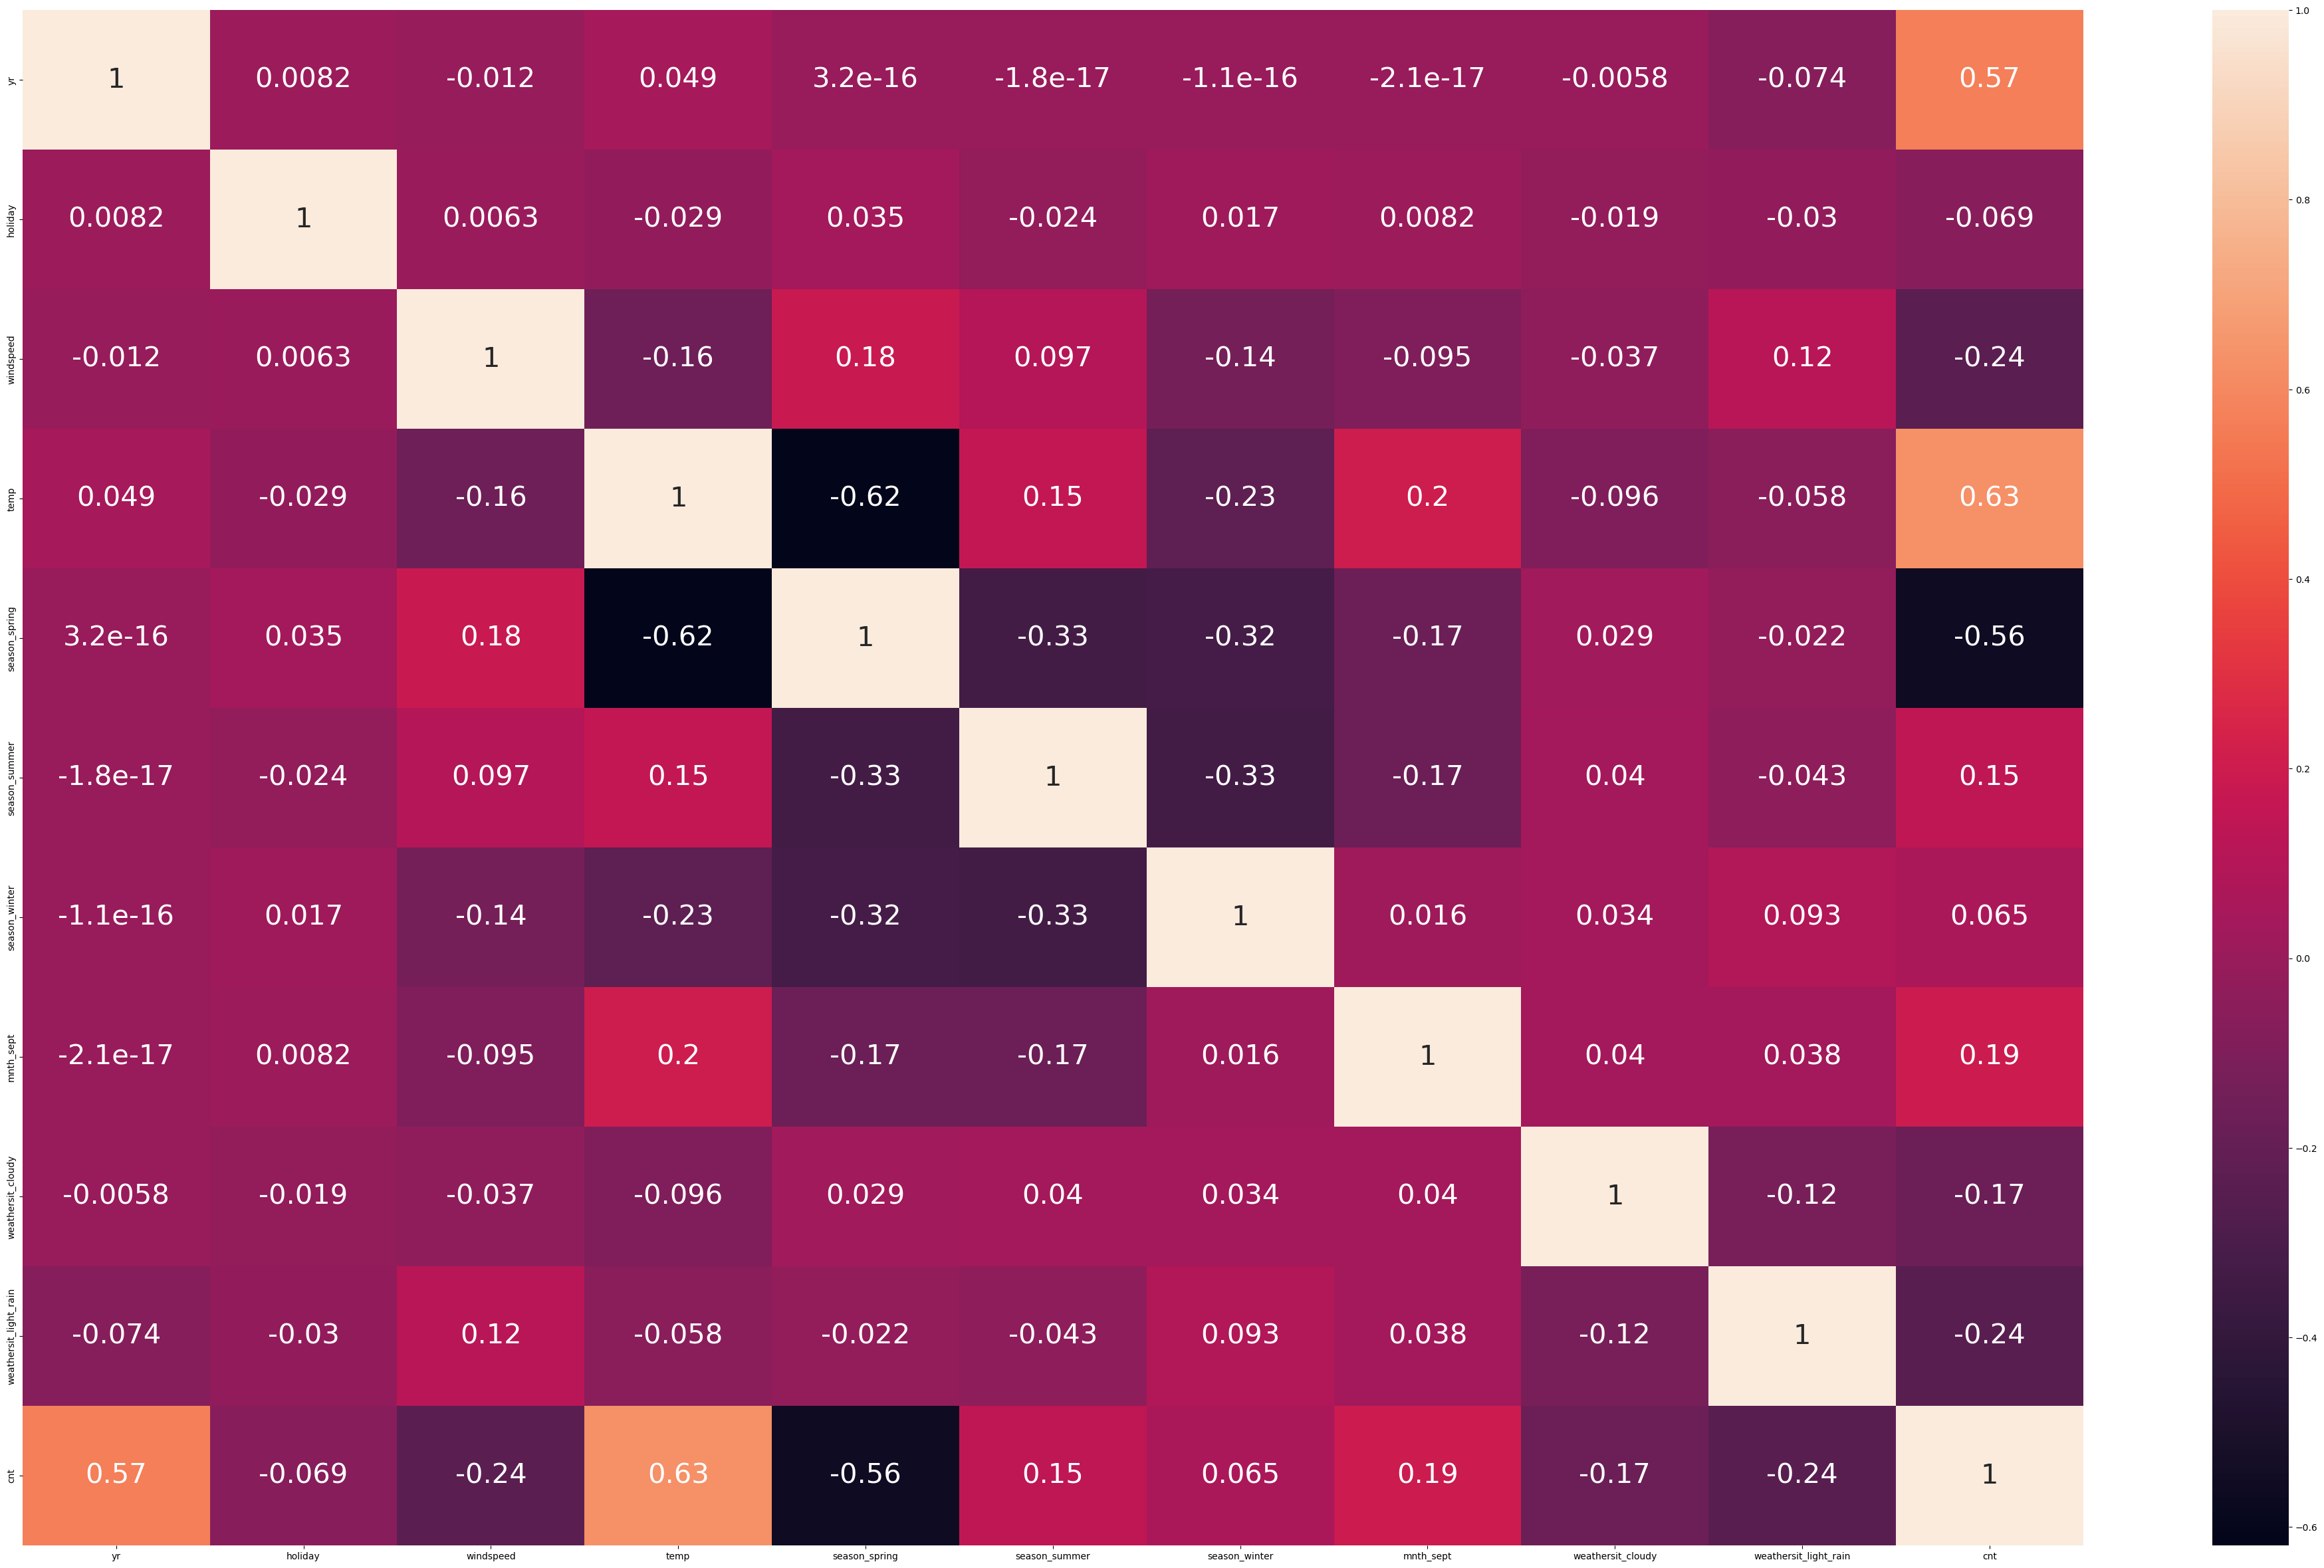

In [196]:
plt.figure(figsize=(50,30))
sns.heatmap(df[['yr', 'holiday', 'windspeed','temp','season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain','cnt']].corr(),annot=True,annot_kws={"size":30})

In [197]:
# model assessment

In [198]:
# Residual analysis 


In [199]:
Y_train_pred10 = lr_model10.predict(X_train_sm10)

In [200]:
Y_train_pred10

576    6760.237298
426    4058.314918
728    3398.575571
482    4971.514233
111    2481.665189
          ...     
578    7062.717162
53     1897.313897
350    2292.535447
79     2775.165941
520    5600.659329
Length: 510, dtype: float64

In [201]:
residual=Y_train['cnt']-Y_train_pred10

In [202]:
residual

576     455.762702
426       7.685082
728   -1602.575571
482    -751.514233
111    -798.665189
          ...     
578     198.282838
53       19.686103
350     446.464553
79     -698.165941
520    1400.340671
Length: 510, dtype: float64

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

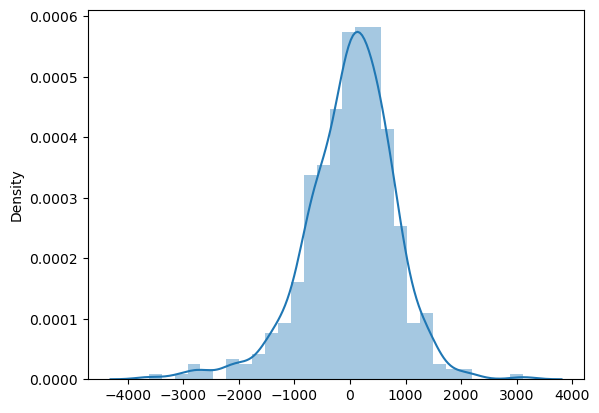

In [203]:
sns.distplot(residual)

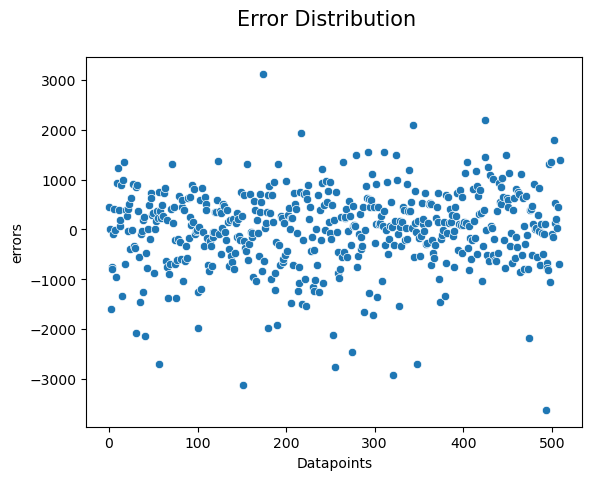

In [204]:
# check if the errors are distributed randomly 
x_axis = [i for i in range(0,Y_train.shape[0],1)]
sns.scatterplot(x=x_axis,y=residual)
plt.suptitle('Error Distribution', fontsize = 15)
plt.xlabel('Datapoints')
plt.ylabel('errors')
plt.show()

In [205]:
# thus we can see that the errors are equally scattered about zero and there is no grouping/pattern

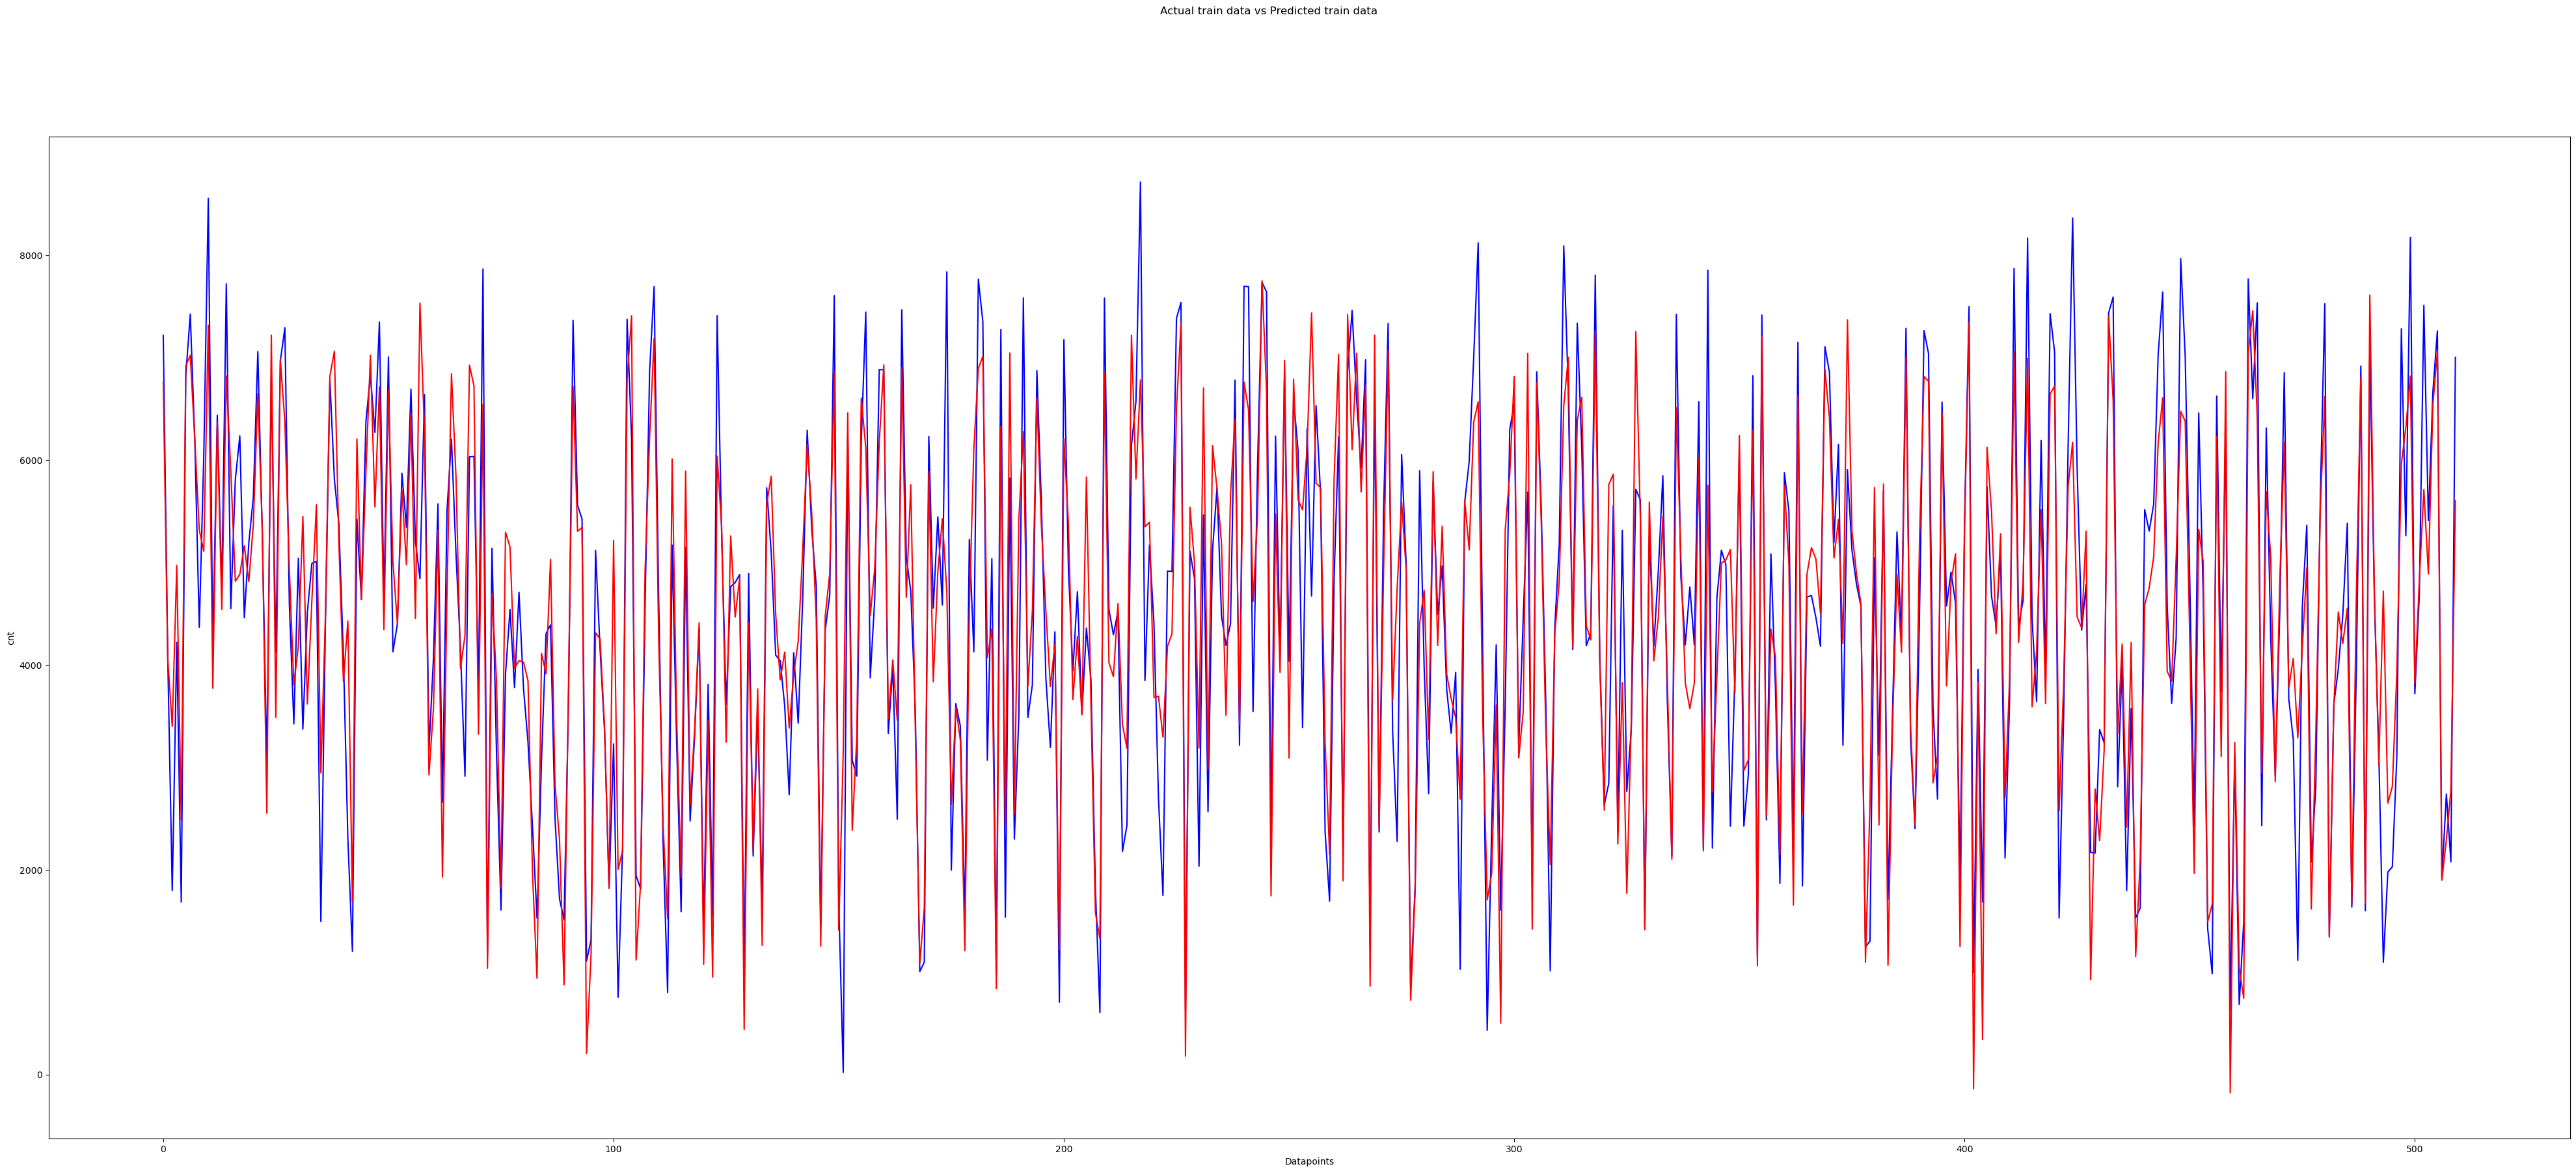

In [206]:
# Check if the the pattern is traced properly by the model
x_axis = [i for i in range(0,Y_train.shape[0],1)]
plt.figure(figsize=(50,20))
plt.plot(x_axis,Y_train, color="blue")
plt.plot(x_axis,Y_train_pred10, color="red")
plt.suptitle('Actual train data vs Predicted train data')
plt.xlabel('Datapoints')
plt.ylabel('cnt')
plt.show()

In [207]:
# thus the trend is captured properly

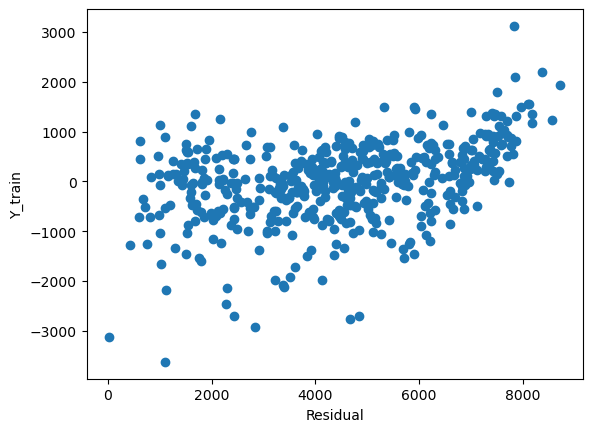

In [208]:
# check if residuals hav linear relation with training data
plt.scatter(Y_train,residual)
plt.ylabel("Y_train")
plt.xlabel("Residual")
plt.show()

In [209]:
# thus here we see a linear relation showing homoscedasticity

In [210]:
# thus all the assumptions of linear regression is satisfied

In [211]:
# runnig the model on test data

In [212]:
#scaling the numerical/continous variables
numerical_columns=["temp","atemp","hum","windspeed"]
df_test[numerical_columns]=scaler.transform(df_test[numerical_columns])

In [213]:
Y_test=df_test[["cnt"]]
df_test.drop(["cnt"],axis=1,inplace=True)
X_test=df_test.copy()
X_test_sm10=sm.add_constant(X_test[final_columns])


In [214]:
X_test_sm10

const  yr  holiday  windspeed      temp  season_spring  season_summer  \
184    1.0   0        1   0.084219  0.831783              0              0   
535    1.0   1        0   0.153728  0.901354              0              1   
299    1.0   0        0   0.334206  0.511964              0              0   
221    1.0   0        0   0.339570  0.881625              0              0   
152    1.0   0        0   0.537414  0.817246              0              1   
..     ...  ..      ...        ...       ...            ...            ...   
702    1.0   1        0   0.283397  0.519232              0              0   
127    1.0   0        0   0.069510  0.584649              0              1   
640    1.0   1        0   0.052115  0.745598              0              0   
72     1.0   0        0   0.203418  0.331557              1              0   
653    1.0   1        0   0.300794  0.509887              0              0   

     season_winter  mnth_sept  weathersit_cloudy  weathersit_light_rain  
184              0          0                  1                      0  
535              0          0                  0                      0  
299              1          0                  1                      0  
221              0          0                  0                      0  
152              0          0                  0                      0  
..             ...        ...                ...                    ...  
702              1          0                  0                      0  
127              0          0                  0                      0  
640              1          0                  1                      0  
72               0          0                  0                      0  
653              1          0                  0                      0  

[220 rows x 11 columns]

In [215]:

Y_test_pred10 = lr_model10.predict(X_test_sm10)

In [216]:
r2_score(Y_test,Y_test_pred10)

0.8038195990728842

In [217]:
# r2_score of test data is iwthin 5% of the r2 score of training data
# thus the model is behaving properly on new data

In [218]:
residual_test=Y_test['cnt']-Y_test_pred10

In [219]:
residual_test

184    2538.127914
535   -1589.519196
299    -854.392980
221    -124.728463
152      45.720100
          ...     
702     277.533855
127    -225.744544
640     690.243488
72     -268.250393
653    1266.733949
Length: 220, dtype: float64

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

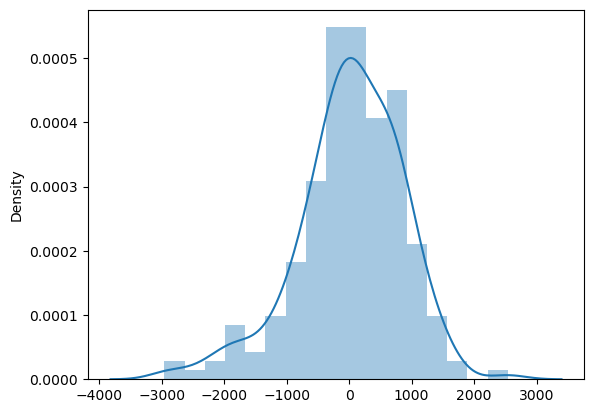

In [220]:
sns.distplot(residual_test)

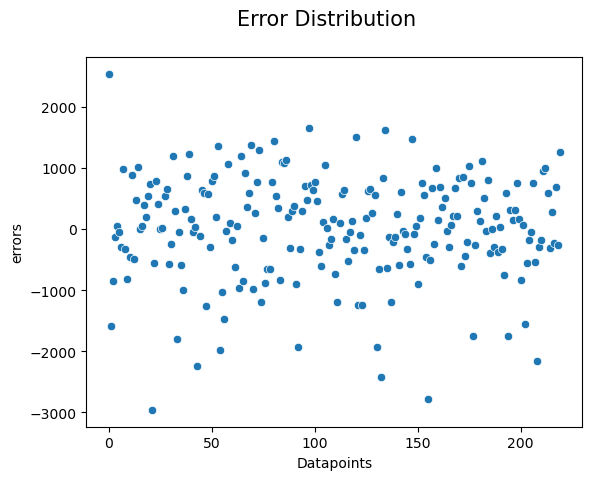

In [221]:
# check if the errors are distributed randomly 
x_axis = [i for i in range(0,Y_test.shape[0],1)]
sns.scatterplot(x=x_axis,y=residual_test)
plt.suptitle('Error Distribution', fontsize = 15)
plt.xlabel('Datapoints')
plt.ylabel('errors')
plt.show()

In [222]:
# thus we can see that the errors are equally scattered about zero and there is no grouping/pattern

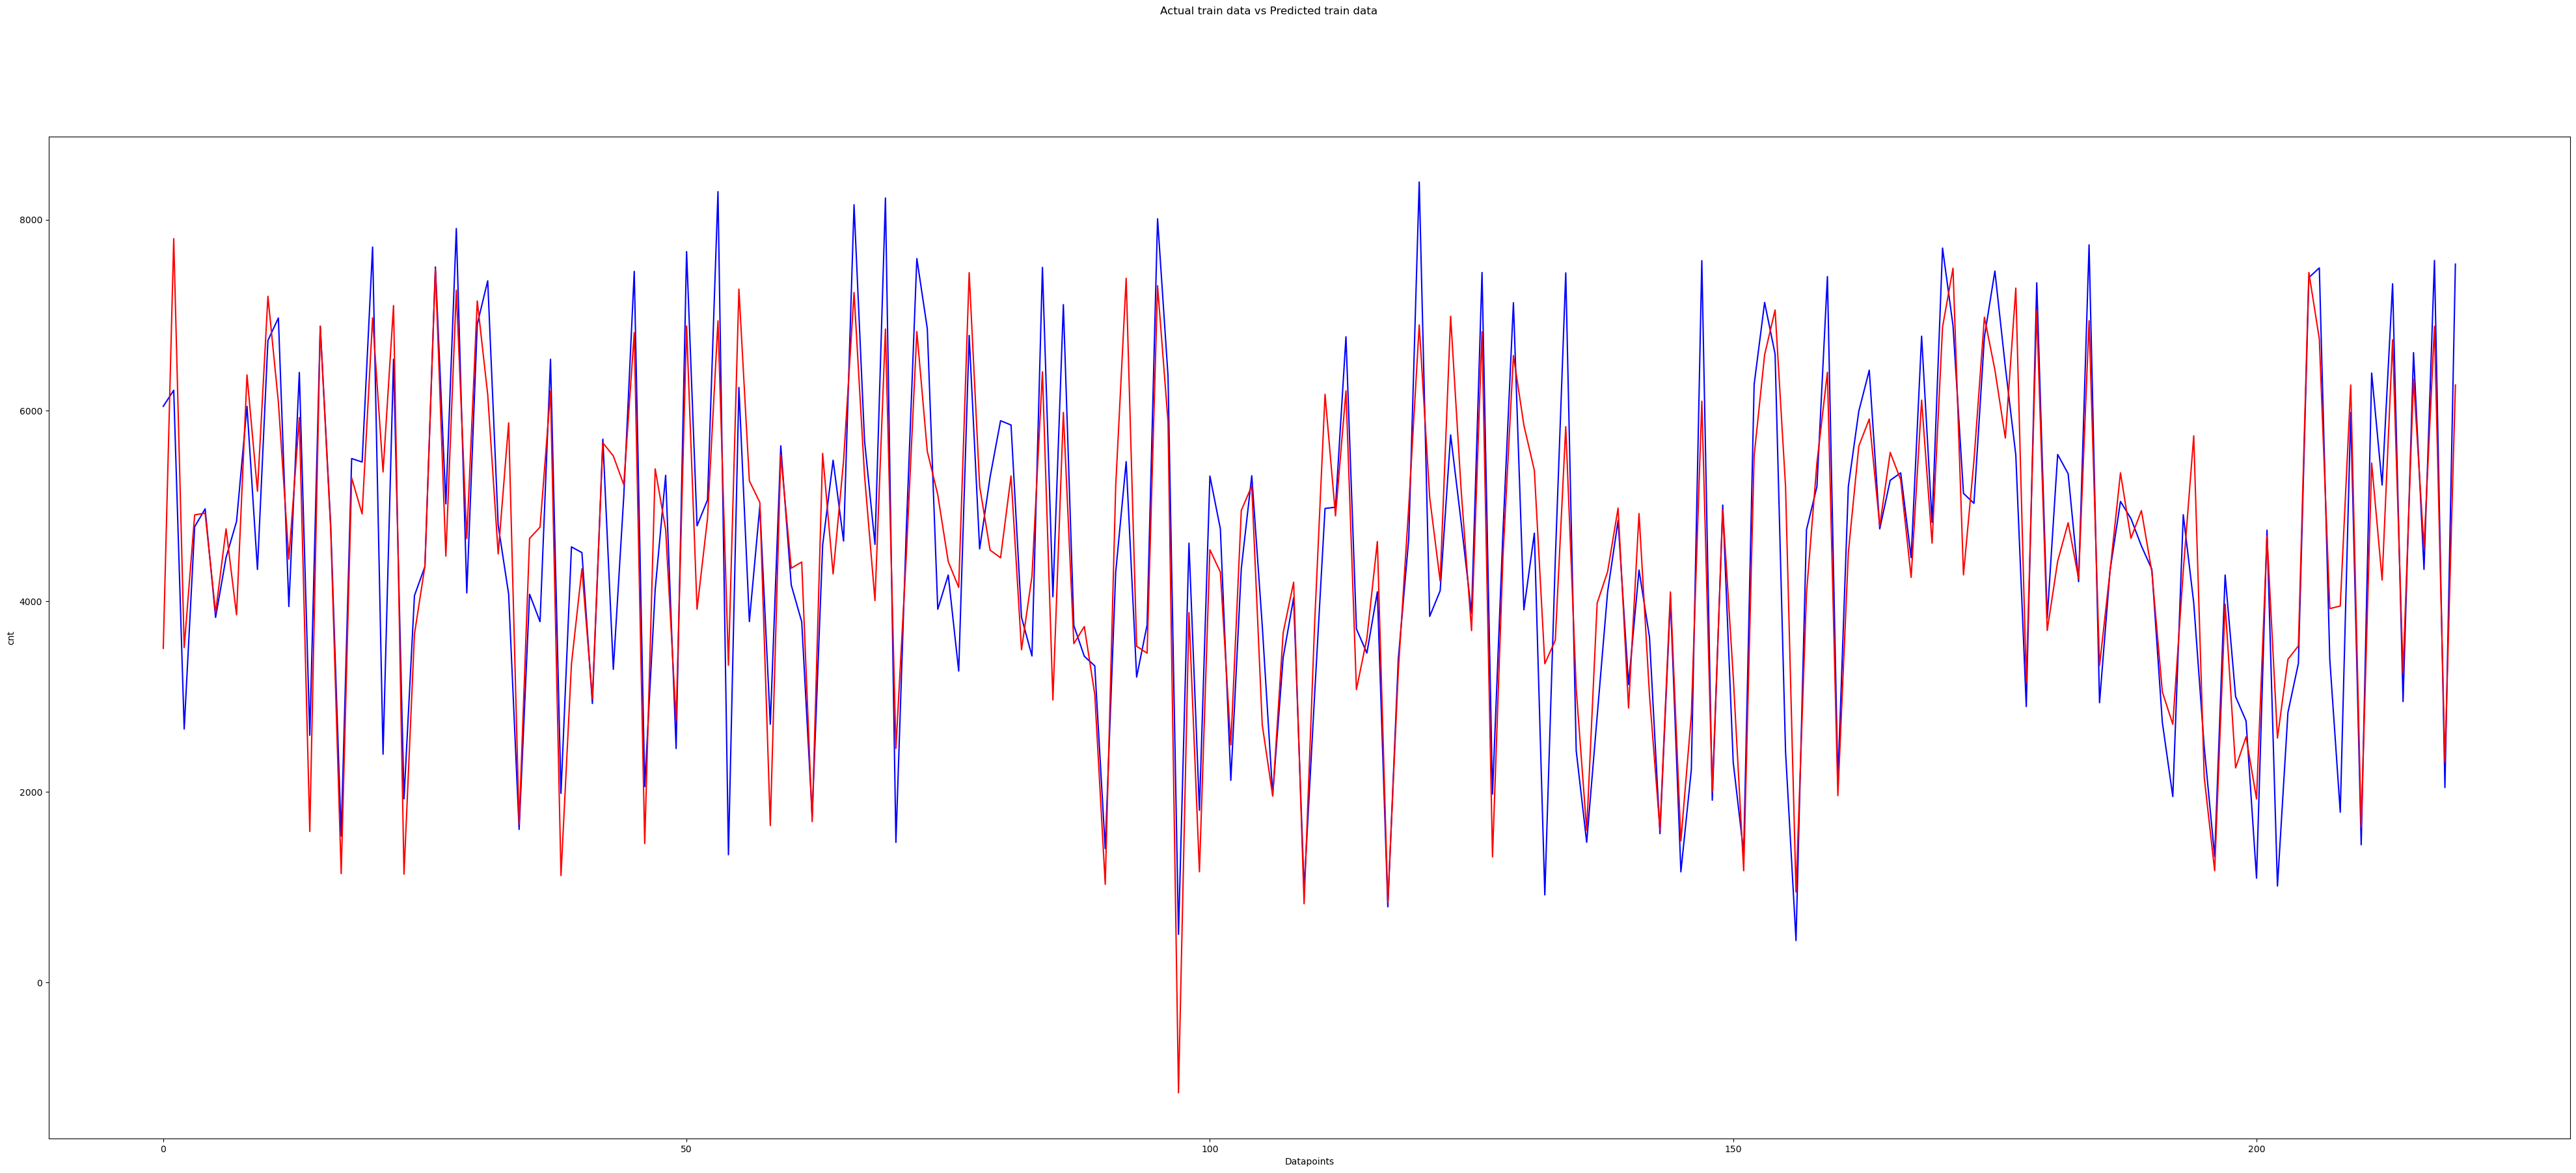

In [223]:
# Check if the the pattern is traced properly by the model
x_axis = [i for i in range(0,Y_test.shape[0],1)]
plt.figure(figsize=(50,20))
plt.plot(x_axis,Y_test, color="blue")
plt.plot(x_axis,Y_test_pred10, color="red")
plt.suptitle('Actual train data vs Predicted train data')
plt.xlabel('Datapoints')
plt.ylabel('cnt')
plt.show()

In [224]:
# thus the trend is captured properly

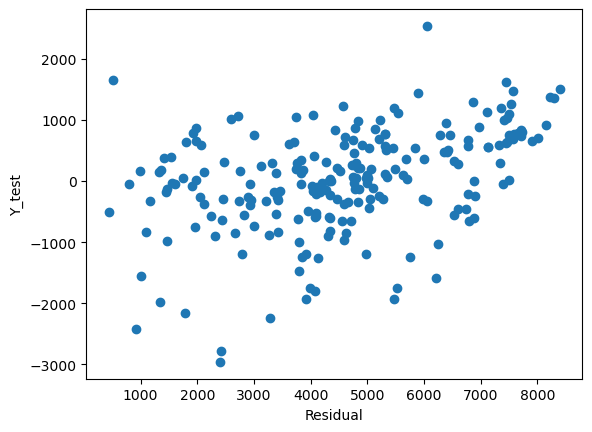

In [225]:
# check if residuals hav linear relation with training data
plt.scatter(Y_test,residual_test)
plt.ylabel("Y_test")
plt.xlabel("Residual")
plt.show()

In [226]:
# thus here we see a linear relation showing homoscedasticity

In [227]:
# Conclusion
"""
1. The feature important for prediction are 
   ['yr', 'holiday', 'windspeed','temp','season_spring',
      'season_summer', 'season_winter', 'mnth_sept',
      'weathersit_cloudy', 'weathersit_light_rain']
2. September month  has the highest median no of customers, so business can launch ne w product/marketting campain during this time
3. Holidays, windspeed and temp will affect no of customers
4. Winter and summer season will have more customers
5. Customers will take a hit in cloudy and light rain weather
6. Customers have increase from 2018 to 2019 so it will continue this trend
"""

"\n1. The feature important for prediction are \n   ['yr', 'holiday', 'windspeed','temp','season_spring',\n      'season_summer', 'season_winter', 'mnth_sept',\n      'weathersit_cloudy', 'weathersit_light_rain']\n2. September month  has the highest median no of customers, so business can launch ne w product/marketting campain during this time\n3. Holidays, windspeed and temp will affect no of customers\n4. Winter and summer season will have more customers\n5. Customers will take a hit in cloudy and light rain weather\n6. Customers have increase from 2018 to 2019 so it will continue this trend\n"

In [232]:
import pickle
pickle.dump(lr_model10,open('pickle_files//regmodel.pkl','wb'))
pickle.dump(scaler,open('pickle_files//scalermodel.pkl','wb'))


In [410]:
test_df=pd.read_csv(r"day.csv")

In [411]:
test_df=test_df.loc[2:2]
test_df

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
2        3  03-01-2018       1   0     1        0        3           1   

   weathersit      temp    atemp      hum  windspeed  casual  registered   cnt  
2           1  8.050924  9.47025  43.7273  16.636703     120        1229  1349

In [412]:
test_df.weathersit.replace({1:'clear',2:'cloudy',3:'light_rain',4:'heavy_rain'},inplace = True)
test_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
test_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)
test_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)

In [413]:
test_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [414]:
# testing the model from individual entries
test_df = pd.get_dummies(data=test_df,columns=["season","mnth","weekday"])
test_df = pd.get_dummies(data=test_df,columns=["weathersit"])

In [416]:
test_df

instant      dteday  yr  holiday  workingday      temp    atemp      hum  \
2        3  03-01-2018   0        0           1  8.050924  9.47025  43.7273   

   windspeed  casual  registered   cnt  season_spring  mnth_jan  weekday_wed  \
2  16.636703     120        1229  1349              1         1            1   

   weathersit_clear  
2                 1

In [409]:
df=pd.DataFrame(columns=['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_fall',
       'season_spring', 'season_summer', 'season_winter', 'mnth_apr',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_clear',
       'weathersit_cloudy', 'weathersit_light_rain'])
df

Empty DataFrame
Columns: [instant, dteday, yr, holiday, workingday, temp, atemp, hum, windspeed, casual, registered, cnt, season_fall, season_spring, season_summer, season_winter, mnth_apr, mnth_aug, mnth_dec, mnth_feb, mnth_jan, mnth_jul, mnth_jun, mnth_mar, mnth_may, mnth_nov, mnth_oct, mnth_sept, weekday_fri, weekday_mon, weekday_sat, weekday_sun, weekday_thu, weekday_tue, weekday_wed, weathersit_clear, weathersit_cloudy, weathersit_light_rain]
Index: []

[0 rows x 38 columns]

In [417]:
test_df=pd.concat([df,test_df],axis=0)
test_df.fillna(0,inplace=True)

In [419]:
test_df.fillna(0,inplace=True)

instant      dteday  yr  holiday  workingday      temp    atemp      hum  \
2        3  03-01-2018   0        0           1  8.050924  9.47025  43.7273   

   windspeed  casual  ...  weekday_fri  weekday_mon  weekday_sat  weekday_sun  \
2  16.636703     120  ...            0            0            0            0   

   weekday_thu  weekday_tue  weekday_wed  weathersit_clear  weathersit_cloudy  \
2            0            0            1                 1                  0   

   weathersit_light_rain  
2                      0  

[1 rows x 38 columns]

In [348]:
final_columns=['yr', 'holiday', 'windspeed','temp','season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_cloudy', 'weathersit_light_rain']

In [349]:
test_df

instant      dteday  yr  holiday  workingday       temp     atemp  \
0          1  01-01-2018   0        0           1  14.110847  18.18125   
1          2  02-01-2018   0        0           1  14.902598  17.68695   
2          3  03-01-2018   0        0           1   8.050924   9.47025   
3          4  04-01-2018   0        0           1   8.200000  10.60610   
4          5  05-01-2018   0        0           1   9.305237  11.46350   
..       ...         ...  ..      ...         ...        ...       ...   
725      726  27-12-2019   1        0           1  10.420847  11.33210   
726      727  28-12-2019   1        0           0  10.386653  12.75230   
727      728  29-12-2019   1        0           0  10.386653  12.12000   
728      729  30-12-2019   1        0           1  10.489153  11.58500   
729      730  31-12-2019   1        0           1   8.849153  11.17435   

         hum  windspeed  casual  ...  mnth_sept  weekday_mon  weekday_sat  \
0    80.5833  10.749882     331  ...          0            1            0   
1    69.6087  16.652113     131  ...          0            0            0   
2    43.7273  16.636703     120  ...          0            0            0   
3    59.0435  10.739832     108  ...          0            0            0   
4    43.6957  12.522300      82  ...          0            0            0   
..       ...        ...     ...  ...        ...          ...          ...   
725  65.2917  23.458911     247  ...          0            0            0   
726  59.0000  10.416557     644  ...          0            0            1   
727  75.2917   8.333661     159  ...          0            0            0   
728  48.3333  23.500518     364  ...          0            1            0   
729  57.7500  10.374682     439  ...          0            0            0   

     weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_clear  \
0              0            0            0            0                 0   
1              0            0            1            0                 0   
2              0            0            0            1                 1   
3              0            1            0            0                 1   
4              0            0            0            0                 1   
..           ...          ...          ...          ...               ...   
725            0            0            0            0                 0   
726            0            0            0            0                 0   
727            1            0            0            0                 0   
728            0            0            0            0                 1   
729            0            0            1            0                 0   

     weathersit_cloudy  weathersit_light_rain  
0                    1                      0  
1                    1                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0  
..                 ...                    ...  
725                  1                      0  
726                  1                      0  
727                  1                      0  
728                  0                      0  
729                  1                      0  

[730 rows x 35 columns]

In [350]:
test_df1=test_df.loc[2:2]
test_df1

instant      dteday  yr  holiday  workingday      temp    atemp      hum  \
2        3  03-01-2018   0        0           1  8.050924  9.47025  43.7273   

   windspeed  casual  ...  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
2  16.636703     120  ...          0            0            0            0   

   weekday_thu  weekday_tue  weekday_wed  weathersit_clear  weathersit_cloudy  \
2            0            0            1                 1                  0   

   weathersit_light_rain  
2                      0  

[1 rows x 35 columns]

In [351]:
#scaling the numerical/continous variables
numerical_columns=["temp","atemp","hum","windspeed"]
test_df1[numerical_columns]=scaler.transform(test_df1[numerical_columns])

C:\Users\ashis\AppData\Local\Temp\ipykernel_35900\661390076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df1[numerical_columns]=scaler.transform(test_df1[numerical_columns])


In [352]:
test_df1["cnt"]

2    1349
Name: cnt, dtype: int64

In [353]:
Y_test=test_df1[["cnt"]]
test_df1.drop(["cnt"],axis=1,inplace=True)
X_test=test_df1.copy()
X_test_sm10=sm.add_constant(X_test[final_columns],has_constant='add')


C:\Users\ashis\AppData\Local\Temp\ipykernel_35900\2761016761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df1.drop(["cnt"],axis=1,inplace=True)


In [354]:
X_test_sm10

const  yr  holiday  windspeed   temp  season_spring  season_summer  \
2    1.0   0        0    0.44287  0.171              1              0   

   season_winter  mnth_sept  weathersit_cloudy  weathersit_light_rain  
2              0          0                  0                      0

In [355]:
pred=lr_model10.predict(X_test_sm10)
pred

2    1339.300694
dtype: float64

In [369]:
pred.item()

1339.3006938096723

In [359]:
!python --version

Python 3.9.13


In [363]:
sm.__version__


'0.13.2'

In [370]:
X_test_sm10

const  yr  holiday  windspeed   temp  season_spring  season_summer  \
2    1.0   0        0    0.44287  0.171              1              0   

   season_winter  mnth_sept  weathersit_cloudy  weathersit_light_rain  
2              0          0                  0                      0

In [ ]:
# for postman

In [372]:
test_df=pd.read_csv(r"day.csv")

In [379]:
test_df.loc[2:2].to_dict('records')

[{'instant': 3,
  'dteday': '03-01-2018',
  'season': 1,
  'yr': 0,
  'mnth': 1,
  'holiday': 0,
  'weekday': 3,
  'workingday': 1,
  'weathersit': 1,
  'temp': 8.050924,
  'atemp': 9.47025,
  'hum': 43.7273,
  'windspeed': 16.636703,
  'casual': 120,
  'registered': 1229,
  'cnt': 1349}]